# BOOKSY recruitment task

Using the tool of your choice (PowerBI, Python, Excel, Google Sheets), conduct an analysis in one of the following areas: activation, retention, churn, segmentation, or another area of your choice, with justification. Business insights and recommendations for the future are highly valued.

# IMPORTS & FUNCTIONS & VARIABLES

In [1]:
# imports

import platform
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import jinja2
import numpy as np
import duckdb
from matplotlib import colormaps as cm
import scipy
from matplotlib import ticker


print('python: {}'.format(platform.python_version()))
print('matplotlib: {}'.format(matplotlib.__version__))

Matplotlib is building the font cache; this may take a moment.


python: 3.12.7
matplotlib: 3.8.4


In [2]:
#### ******************** FUNCTIONS ***********************************************************************************

# defining function to display structure by the given column (data and plot)
def get_business_grouping_stats(df, grouping_column, color_list):

    # structure of providers
    
    providers_gr = df.groupby(grouping_column, as_index=False).agg(provider_cnt = ('business_identifier', 'nunique'))

    providers_gr['share'] = providers_gr['provider_cnt'] / providers_gr['provider_cnt'].sum()
    providers_gr.set_index(grouping_column, inplace=True)
    
    display(providers_gr
                .sort_values('share', ascending=False)
                .style
                .format({'share':'{:.2%}'},
                        thousands=","
                       )
           )
    print(f"NOTE: One provider can appear multiple times since {grouping_column.replace('_', ' ')} is per provider's category")
    
    # plotting structure of providers
    
    fig, ax1 = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)
    
    ax1.barh(providers_gr.index, providers_gr['provider_cnt'], label='# of providers', color=color_list)
    ax1.invert_yaxis()
    ax1.bar_label(ax1.containers[0], label_type='edge', color='dimgray')
    
    plt.yticks(fontsize=10)
    ax1.xaxis.set_tick_params(length=0)
    plt.xticks(fontsize=0, rotation=90)
    
    ax1.set_title(f'Number of providers per {grouping_column.replace('_', ' ')}', fontsize=12)
    
    plt.show()
    print(f"NOTE: One provider can appear multiple times since {grouping_column.replace('_', ' ')} is per provider's category")


# calculate distribution stats for selected metric
def summary_for_metric(df, metric_column):
    
    # printing distribution stats
    print('\n\n', 
           f'\033[1mDistribution stats for {metric_column}:\033[0m')
    display(df[metric_column].describe()
            # .style.format(precision=0, thousands=",")
           )

    # plotting density histograms for converted and not converted users on one chart
    plt.hist(df[metric_column], density=False, color='gray', bins=50)
    plt.title(f'Distribution by `{metric_column.replace('_', ' ')}`')

    plt.show()


# calculate Pearson correlation
def calculate_correlation(df, x_column, y_column):
    
    plt.scatter(df[x_column], df[y_column], alpha=0.5, color='gray')
    plt.ylabel(y_column)
    plt.xlabel(x_column)
    plt.show()
        
    stat, pvalue = scipy.stats.pearsonr(df[x_column], df[y_column])
    
    print('Corr: ', np.round(stat,5), ' p-value: ', np.round(pvalue,5))


#### ******************** VARIABLES ***********************************************************************************

# defining color palette for categories
colors =  plt.cm.tab20(np.arange(20).astype(int))
colors = np.append(colors, [colors[19]], axis=0)

categories_cmap = cm.get_cmap('tab20')
greys_cmap = cm.get_cmap('Greys')

categories = ['Aesthetic Medicine','Automotive','Barbers','Beauty salon','Brows & Lashes','Dental','Hair Removal','Hair salons','Health','Holistic Medicine','Make-up','Massage','Nail salons','Other','Personal trainers','Pet services','Physical Therapy','Podiatry','Psychotherapy','Tattoo artists']

# PROVIDERS

In [3]:
# importing data from business.csv file
business = pd.read_csv('business.csv', sep=';')

# datetime type columns
business['active_from_date_dt'] = pd.to_datetime(business['active_from_date'], format='%d.%m.%Y')
business['paid_from_date_dt'] = pd.to_datetime(business['paid_from_date'], format='%d.%m.%Y')
business['churn_date_dt'] = pd.to_datetime(business['churn_date'], format='%d.%m.%Y')

# only for analysis
business_ofa = business[business['include_in_analysis'] == 'PRAWDA']

display(business_ofa.info())
display(business.head())

<class 'pandas.core.frame.DataFrame'>
Index: 2581 entries, 0 to 2711
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   business_identifier  2581 non-null   object        
 1   active_from_date     2581 non-null   object        
 2   paid_from_date       1135 non-null   object        
 3   churn_date           256 non-null    object        
 4   status_desc          2581 non-null   object        
 5   category             2581 non-null   object        
 6   registration_source  2552 non-null   object        
 7   include_in_analysis  2581 non-null   object        
 8   active_from_date_dt  2581 non-null   datetime64[ns]
 9   paid_from_date_dt    1135 non-null   datetime64[ns]
 10  churn_date_dt        256 non-null    datetime64[ns]
dtypes: datetime64[ns](3), object(8)
memory usage: 161.3+ KB


None

business_identifier active_from_date paid_from_date churn_date  \
0           1x-646601       27.10.2022            NaN        NaN   
1           1x-826011       09.03.2023            NaN        NaN   
2           1x-358271       15.04.2022            NaN        NaN   
3           1x-781011       19.12.2024            NaN        NaN   
4           1x-076131       05.09.2023            NaN        NaN   

         status_desc      category  registration_source include_in_analysis  \
0  Trial End Blocked   Nail salons      Biz 3.0 App iOS              PRAWDA   
1  Trial End Blocked   Nail salons          Biz 3.0 Web              PRAWDA   
2  Trial End Blocked  Beauty salon  Biz 3.0 App Android              PRAWDA   
3  Trial End Blocked  Hair Removal          Biz 3.0 Web              PRAWDA   
4  Trial End Blocked       Barbers      Biz 3.0 App iOS              PRAWDA   

  active_from_date_dt paid_from_date_dt churn_date_dt  
0          2022-10-27               NaT           NaT  
1          2023-03-09               NaT           NaT  
2          2022-04-15               NaT           NaT  
3          2024-12-19               NaT           NaT  
4          2023-09-05               NaT           NaT

## Activation

#### All providers

In [4]:
# trends for number of new providers + number of new categories added per provider

query = """
    SELECT
        STRFTIME('%Y-%m', active_from_date_dt) AS month_of_activation,
        COUNT(IF(is_first_activation, business_identifier, NULL)) AS provider_first_activation_cnt,
        COUNT(*) AS provider_category_cnt
    FROM (
        SELECT
            business_identifier,
            category,
            active_from_date_dt,
            ROW_NUMBER() OVER (PARTITION BY business_identifier ORDER BY active_from_date_dt) = 1 AS is_first_activation
        FROM
            business
        WHERE
            include_in_analysis = 'PRAWDA'
    )
    GROUP BY 1
    ORDER BY 1
"""

activation_trend = duckdb.query(query).df()

# replacing Pandas index with month_of_creation for plotting
activation_trend_reindexed = activation_trend
activation_trend_reindexed.set_index('month_of_activation', inplace=True)

# adding a pseudo index column to calculate a trendline
idx=0
activation_trend.insert(idx, 'index', value=np.arange(len(activation_trend)))

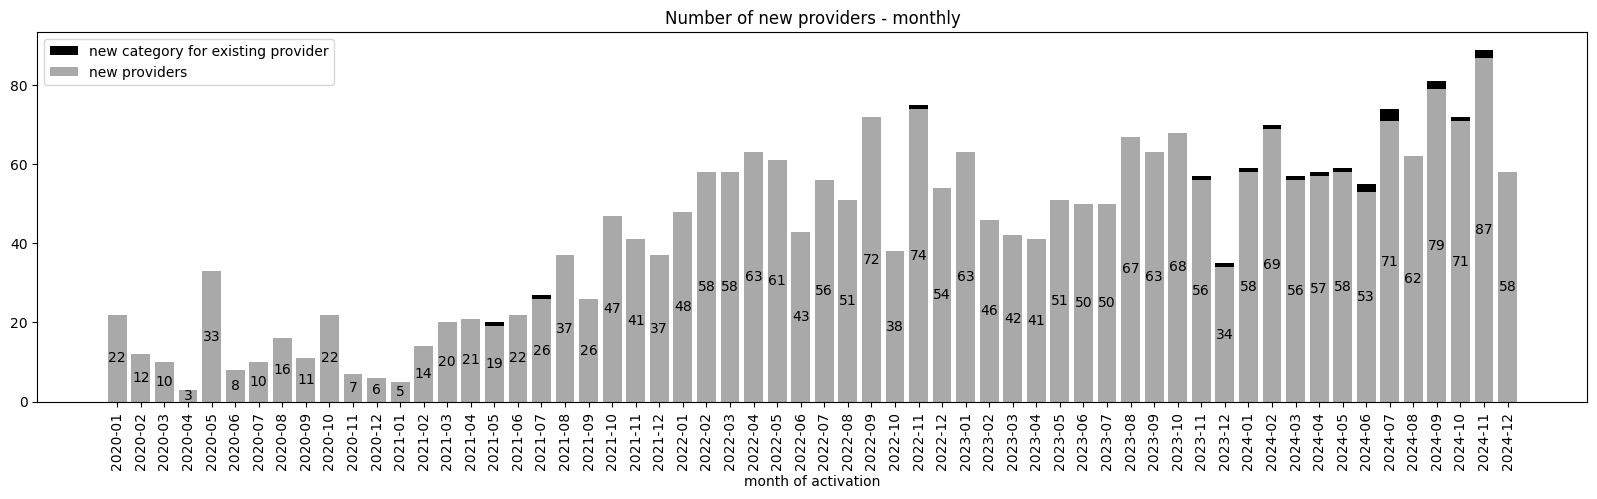

In [5]:
# plotting number of new providers monthly and new categories per provider (business expansion)

fig, ax1 = plt.subplots()
fig.set_figwidth(20)

ax1.bar(activation_trend_reindexed.index, activation_trend_reindexed['provider_category_cnt'], label='new category for existing provider', color='black')
ax1.bar(activation_trend_reindexed.index, activation_trend_reindexed['provider_first_activation_cnt'], label='new providers', color='darkgrey')
ax1.xaxis.set_tick_params(labelsize=10, rotation=90)

ax1.set_title('Number of new providers - monthly')
ax1.bar_label(ax1.containers[1], label_type='center', color='black')

ax1.set_xlabel('month of activation')
plt.legend()


plt.show()

#### Paid subscribers

In [6]:
# trends for number of new providers + number of new categories added per provider

query = """
    SELECT
        STRFTIME('%Y-%m', paid_activation) AS month_of_activation,
        COUNT(*) AS provider_cnt
    FROM (
        SELECT
            business_identifier,
            MIN(paid_from_date_dt) AS paid_activation
        FROM
            business
        WHERE
            include_in_analysis = 'PRAWDA'
            AND paid_from_date IS NOT NULL
        GROUP BY 1
    )
    GROUP BY 1
    ORDER BY 1
"""

paid_activation_trend = duckdb.query(query).df()

# replacing Pandas index with month_of_creation for plotting
paid_activation_trend.set_index('month_of_activation', inplace=True)

# adding a pseudo index column to calculate a trendline
idx=0
paid_activation_trend.insert(idx, 'index', value=np.arange(len(paid_activation_trend)))

#### Trends

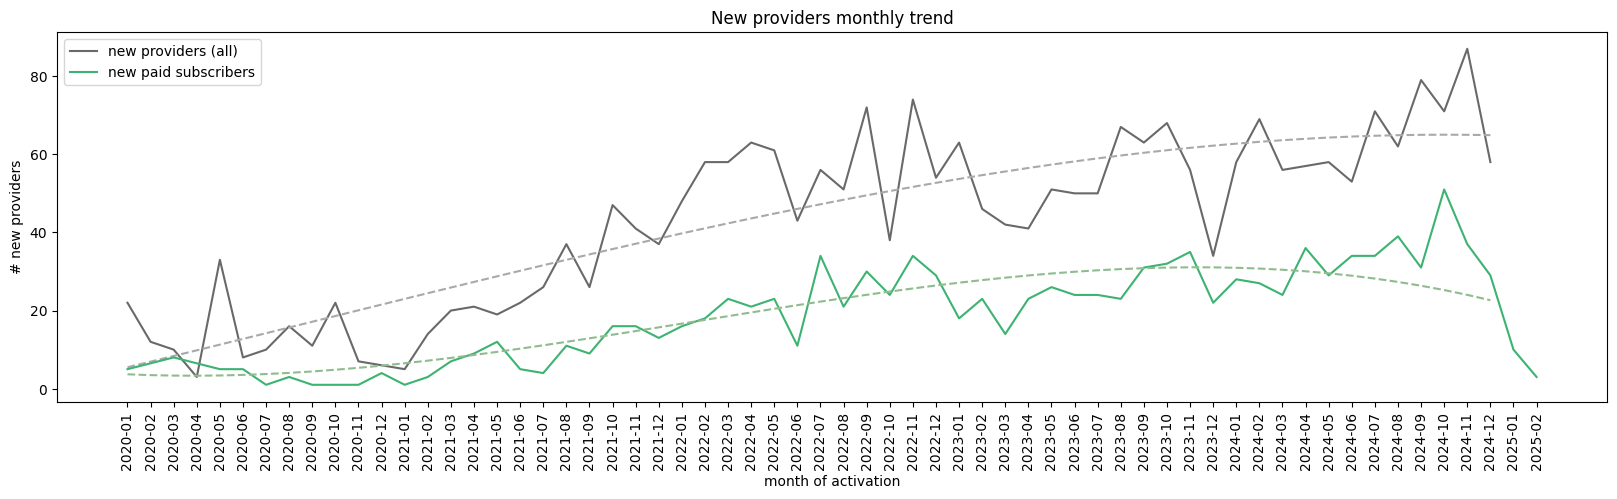

In [7]:
# plotting trends

fig, ax1 = plt.subplots()
fig.set_figwidth(20)

ax1.plot(activation_trend.index, activation_trend['provider_first_activation_cnt'], label='new providers (all)', color='dimgray')
ax1.xaxis.set_tick_params(labelsize=10, rotation=90)
z = np.polyfit(activation_trend['index'], activation_trend['provider_first_activation_cnt'], 3)
p = np.poly1d(z)
plt.plot(activation_trend['index'], p(activation_trend['index']), "--", color='darkgray')


ax1.plot(paid_activation_trend.index, paid_activation_trend['provider_cnt'], label='new paid subscribers', color='mediumseagreen')
ax1.xaxis.set_tick_params(labelsize=10, rotation=90)
z = np.polyfit(paid_activation_trend['index'], paid_activation_trend['provider_cnt'], 3)
p = np.poly1d(z)
plt.plot(paid_activation_trend['index'], p(paid_activation_trend['index']), "--", color='darkseagreen')

ax1.set_title('New providers monthly trend')

ax1.set_xlabel('month of activation')
ax1.set_ylabel('# new providers')
plt.legend(loc='upper left')

plt.show()

#### Structure

NOTE: One provider can appear multiple times since status desc is per provider's category


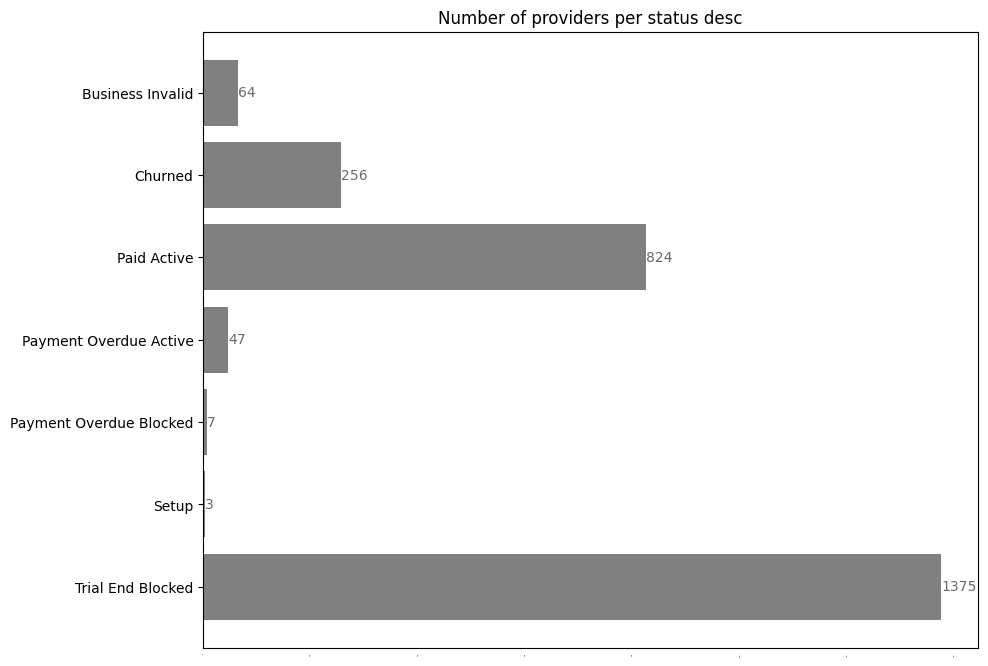

NOTE: One provider can appear multiple times since status desc is per provider's category


In [8]:
# structure of providers per last status
get_business_grouping_stats(business_ofa, 'status_desc', 'gray')

NOTE: One provider can appear multiple times since status desc is per provider's category


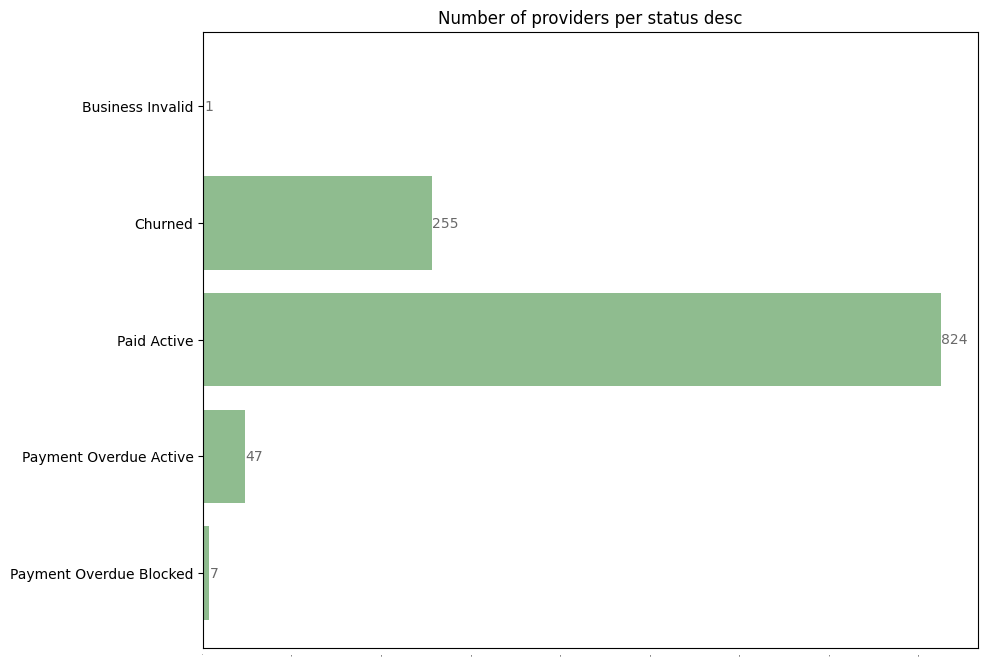

NOTE: One provider can appear multiple times since status desc is per provider's category


In [9]:
# structure of providers WITH PAID SUBSCRIPTION per last status
get_business_grouping_stats(business_ofa[business_ofa['paid_from_date'].isnull()==False], 'status_desc', 'darkseagreen')

NOTE: One provider can appear multiple times since registration source is per provider's category


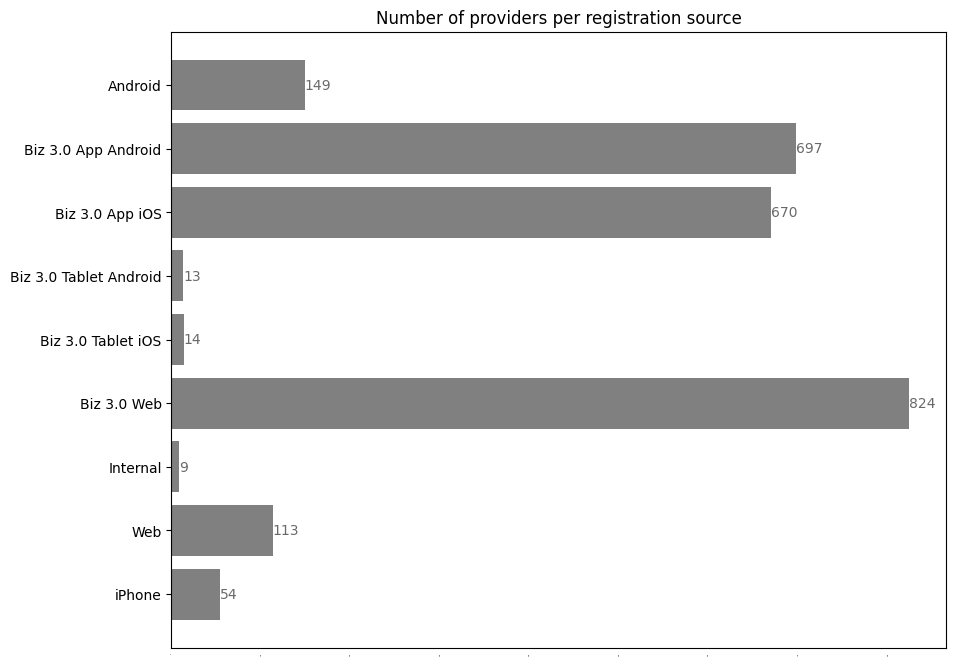

NOTE: One provider can appear multiple times since registration source is per provider's category


In [10]:
# structure of providers per registration source
get_business_grouping_stats(business_ofa, 'registration_source', 'gray')

NOTE: One provider can appear multiple times since registration source is per provider's category


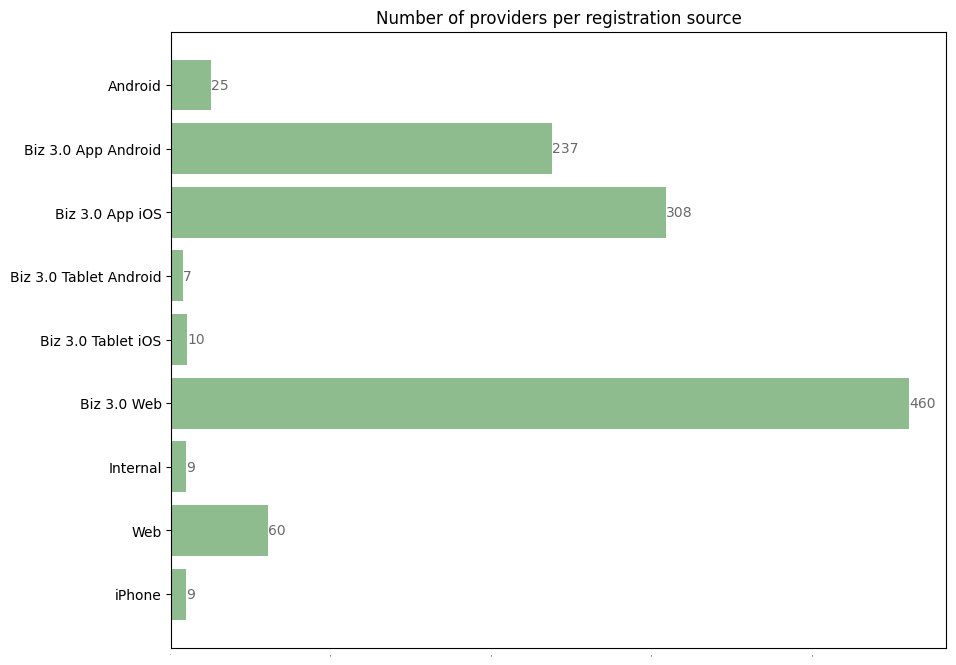

NOTE: One provider can appear multiple times since registration source is per provider's category


In [11]:
# structure of providers WITH PAID SUBSCRIPTION per registration source
get_business_grouping_stats(business_ofa[business_ofa['paid_from_date'].isnull()==False], 'registration_source', 'darkseagreen')

In [12]:
# structure of providers per registration sources count

reg_source_cnt_gr = business_ofa.groupby('business_identifier', as_index=False).agg(reg_source_cnt_per_provider = ('registration_source', 'nunique'))

reg_source_cnt_struct = reg_source_cnt_gr.groupby('reg_source_cnt_per_provider', as_index=False).agg(provider_cnt = ('business_identifier', 'nunique'))
reg_source_cnt_struct['share'] = reg_source_cnt_struct['provider_cnt'] / reg_source_cnt_struct['provider_cnt'].sum()

display(reg_source_cnt_struct
            .style
            .hide(axis="index")
            .format({'share':'{:.2%}'},
                    thousands=","
                   )
       )

## Categories

#### Structure

In [13]:
# structure of providers per category count

category_cnt_gr = business_ofa.groupby('business_identifier', as_index=False).agg(category_cnt_per_provider = ('category', 'nunique'))

category_cnt_struct = category_cnt_gr.groupby('category_cnt_per_provider', as_index=False).agg(provider_cnt = ('business_identifier', 'nunique'))
category_cnt_struct['share'] = category_cnt_struct['provider_cnt'] / category_cnt_struct['provider_cnt'].sum()

display(category_cnt_struct
            .style
            .hide(axis="index")
            .format({'share':'{:.2%}'},
                    thousands=","
                   )
       )

There is less than 1% of providers with more than one category. In further analysis I'll count them multiple times due to the number of categories.

NOTE: One provider can appear multiple times since category is per provider's category


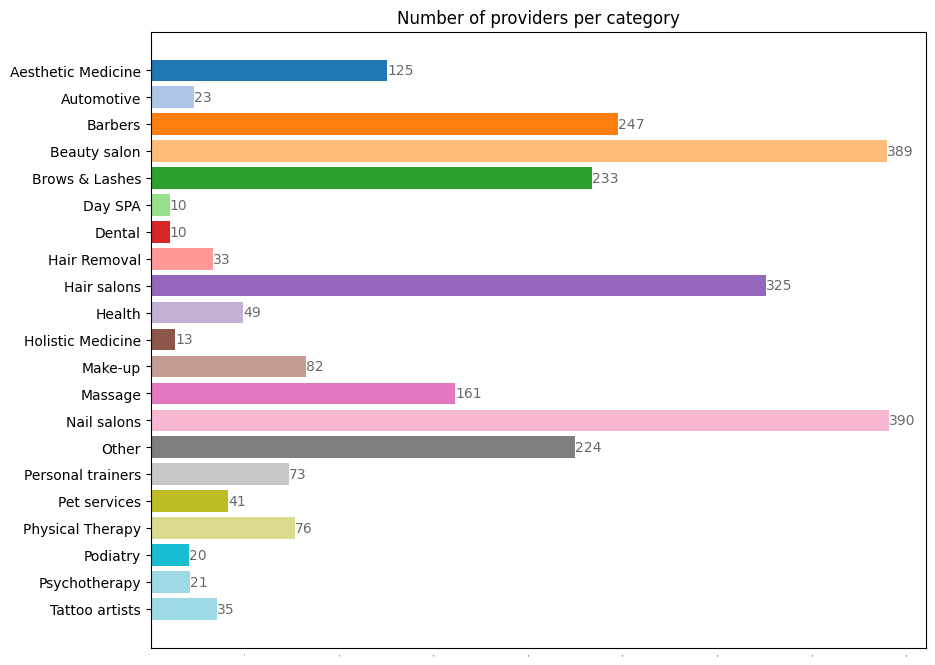

NOTE: One provider can appear multiple times since category is per provider's category


In [14]:
# structure of providers per category
get_business_grouping_stats(business_ofa, 'category', colors)

#### Trends

In [15]:
# trends for number of new providers per category

query = """
    SELECT
        STRFTIME('%Y-%m', active_from_date_dt) AS month_of_activation,
        category,
        business_identifier
    FROM 
        business
    WHERE
        include_in_analysis = 'PRAWDA'
"""

activation_category_trend = duckdb.query(query).df()
ac_trend = activation_category_trend.groupby(['month_of_activation', 'category'])['business_identifier'].count().unstack('category').fillna(0)

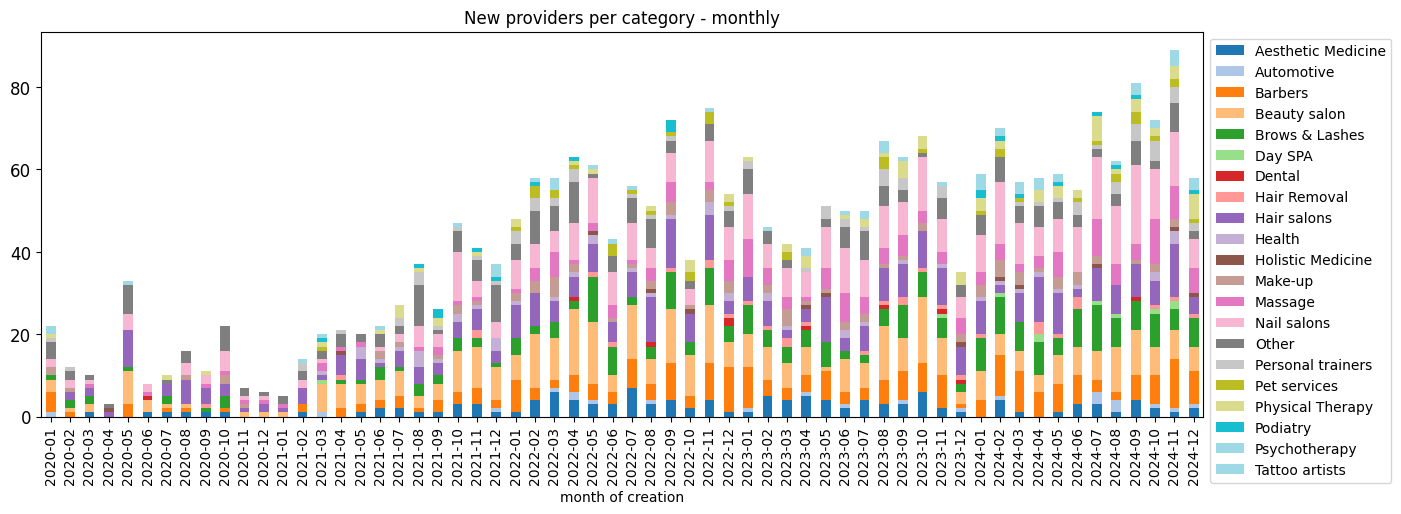

In [16]:
# plot stacked bar plot per category
ax = ac_trend.plot.bar(stacked=True, cmap=categories_cmap, figsize=(15,5), xlabel='month of creation')

plt.yticks(fontsize=12)
plt.xticks(fontsize=10, rotation=90)
plt.legend(fontsize=10, bbox_to_anchor=(1, 1))
plt.title('New providers per category - monthly')

plt.show()

##### Plot per category

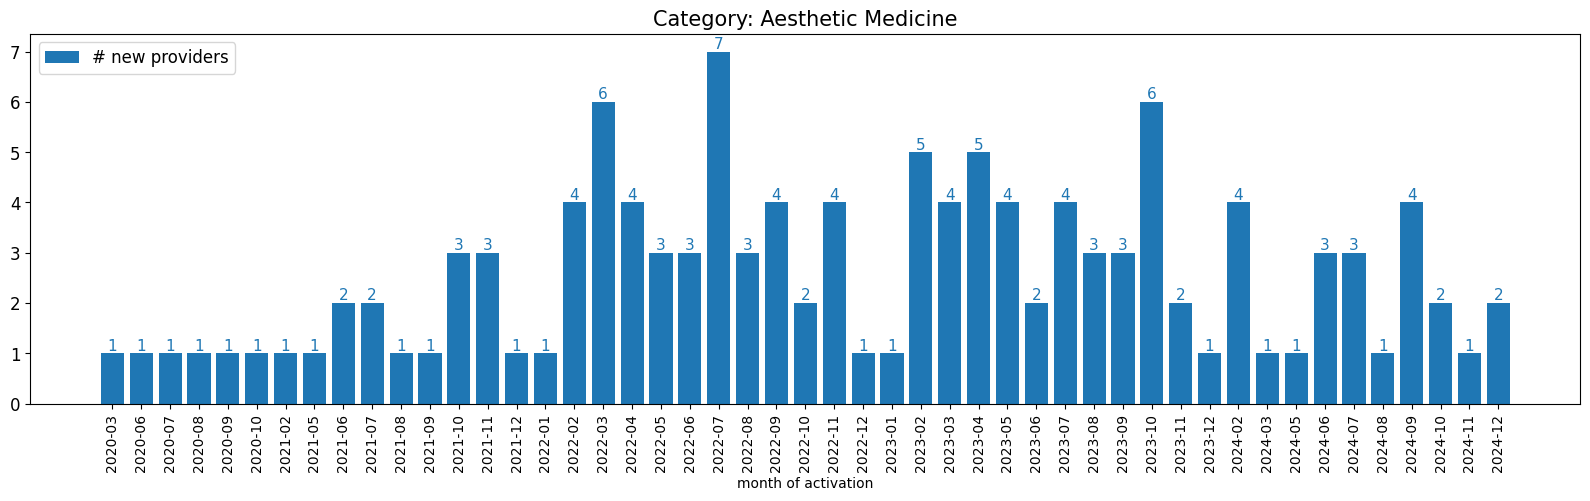

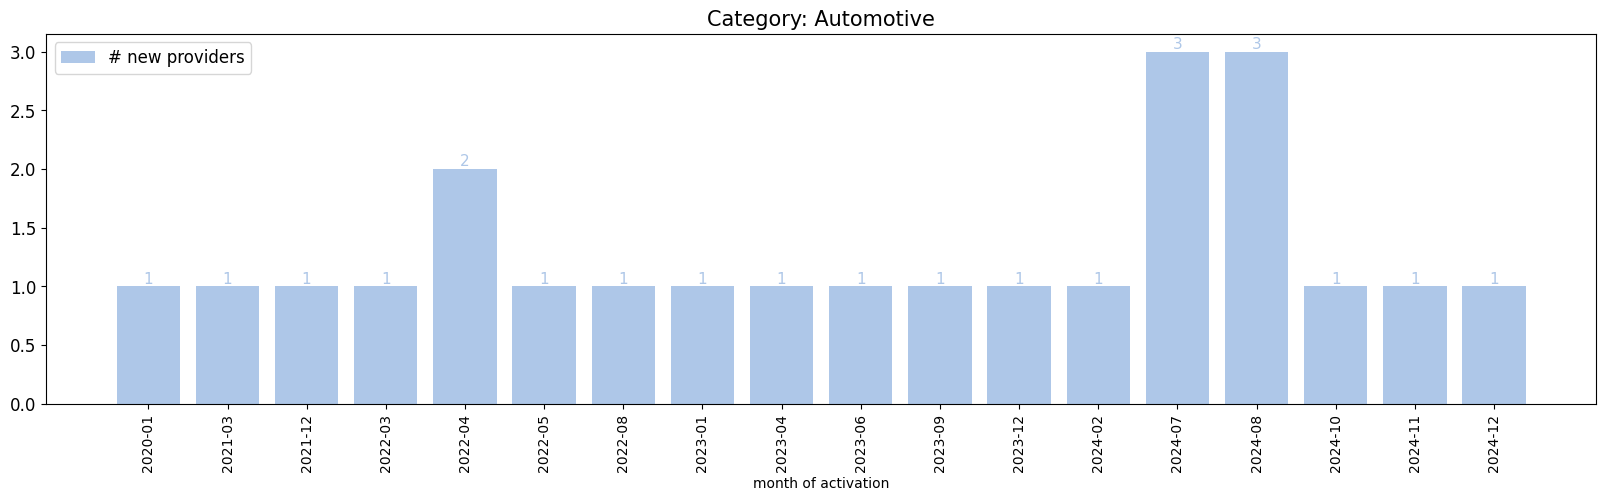

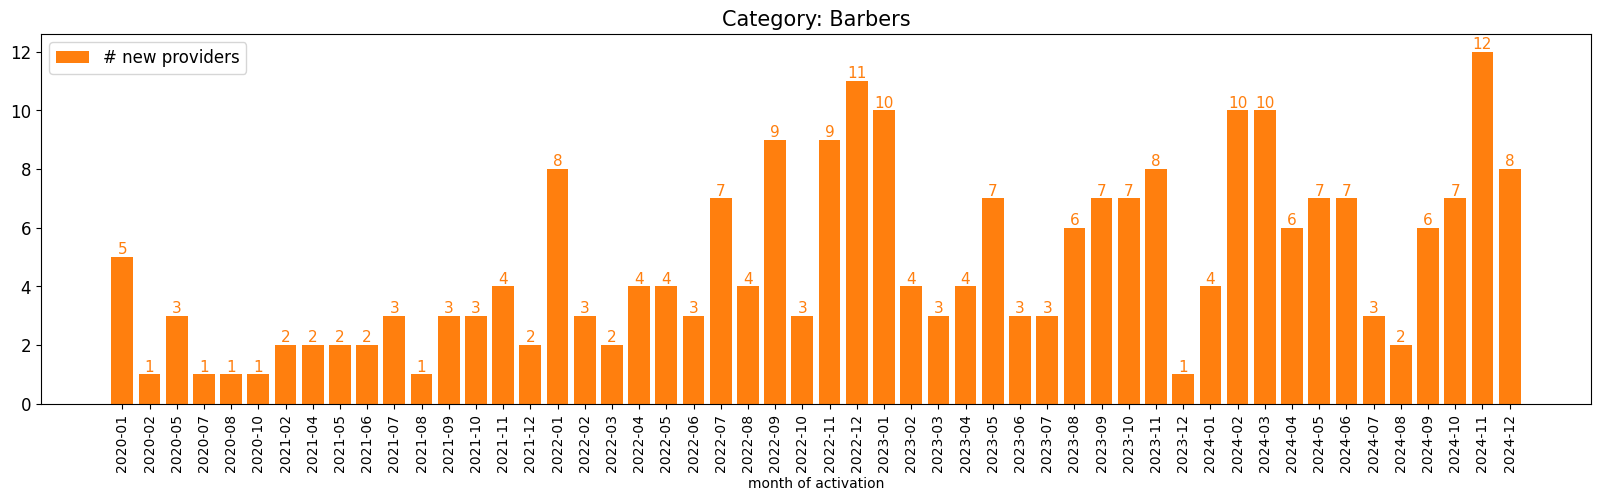

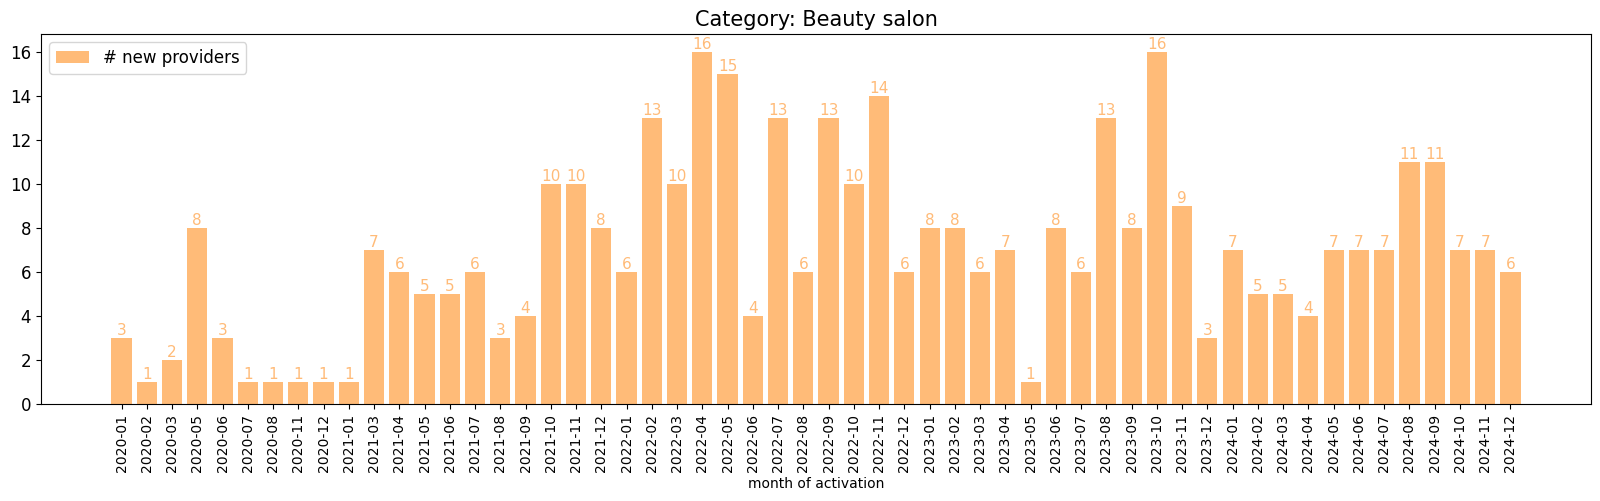

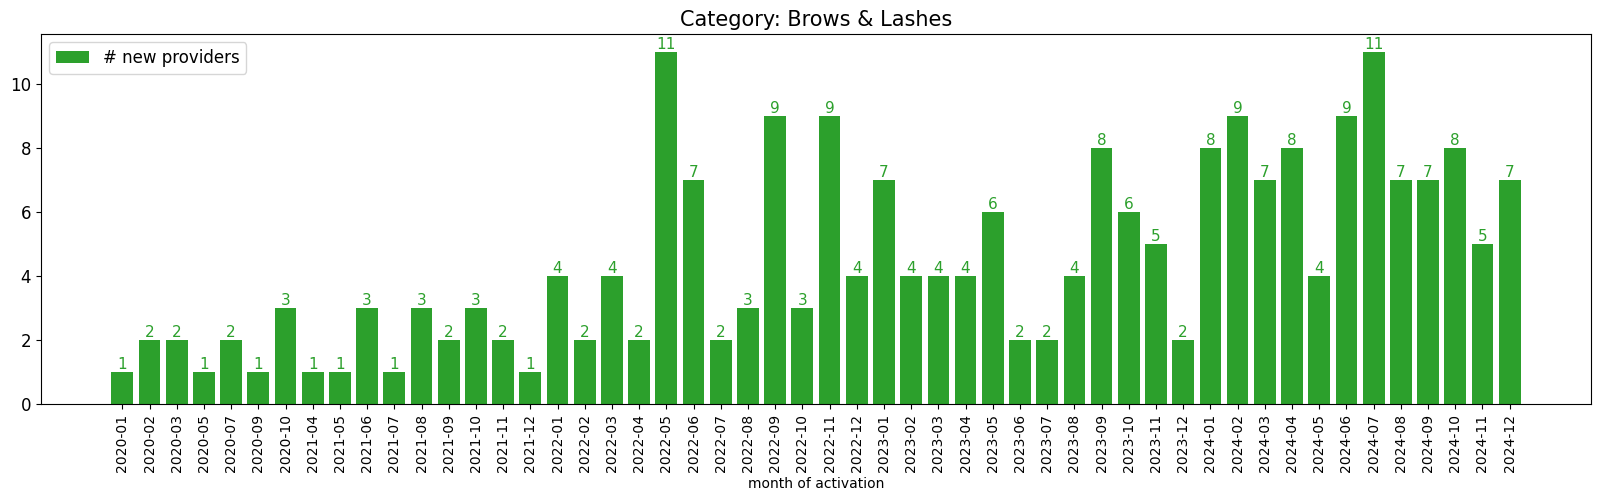

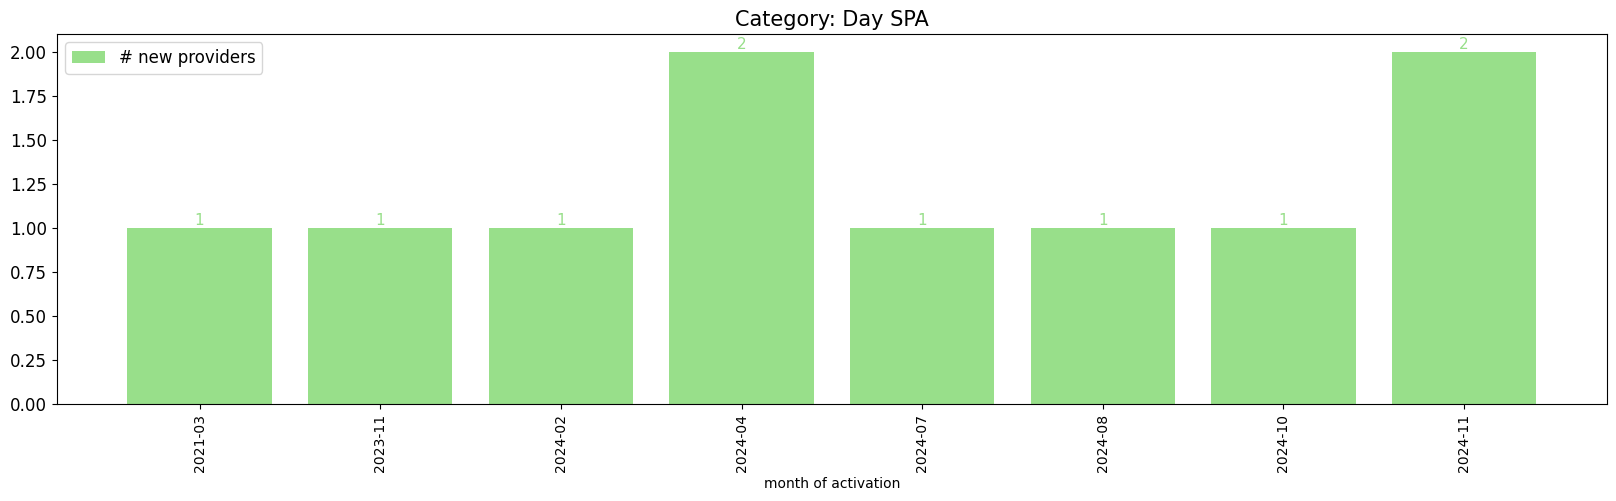

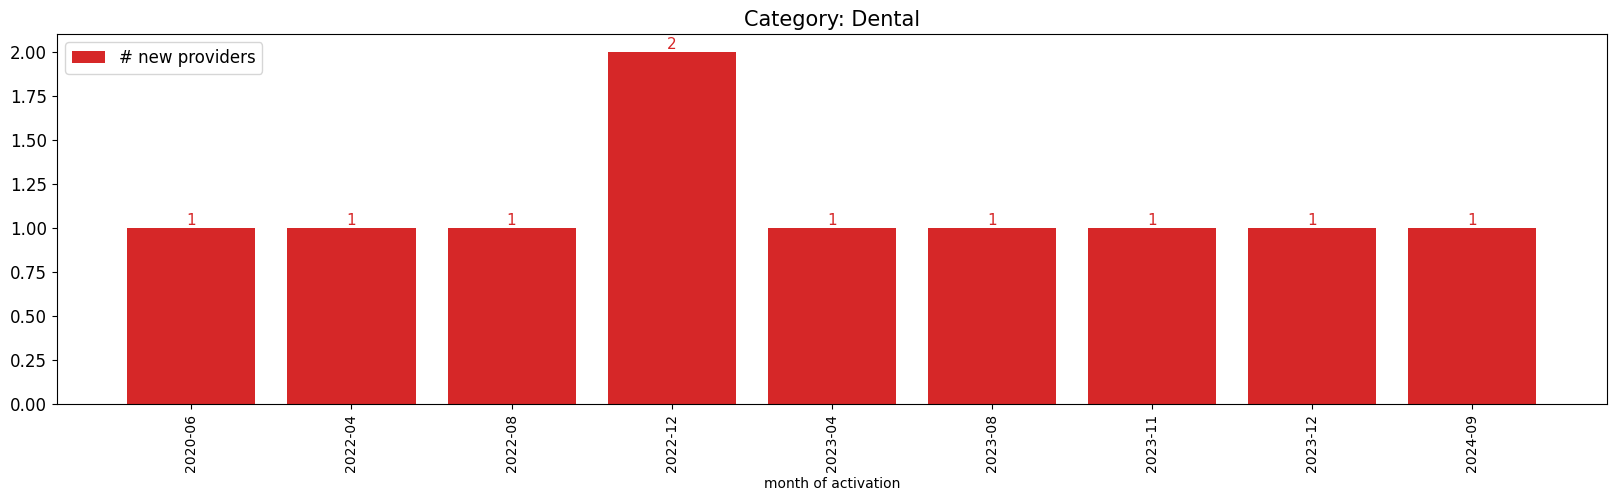

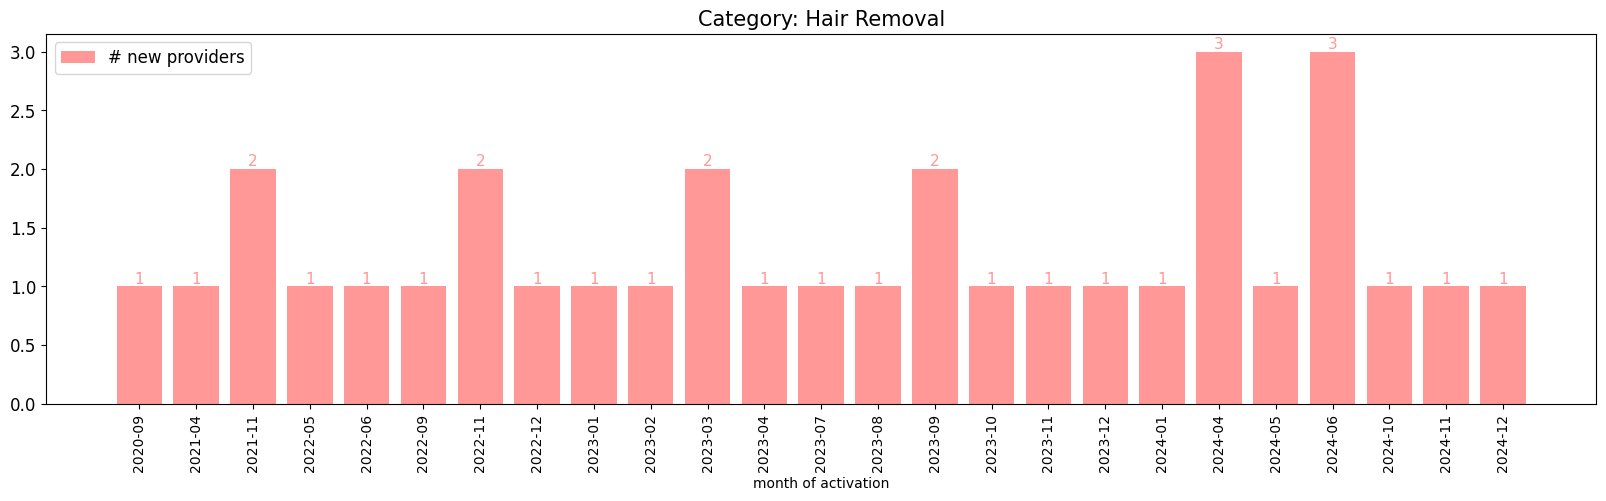

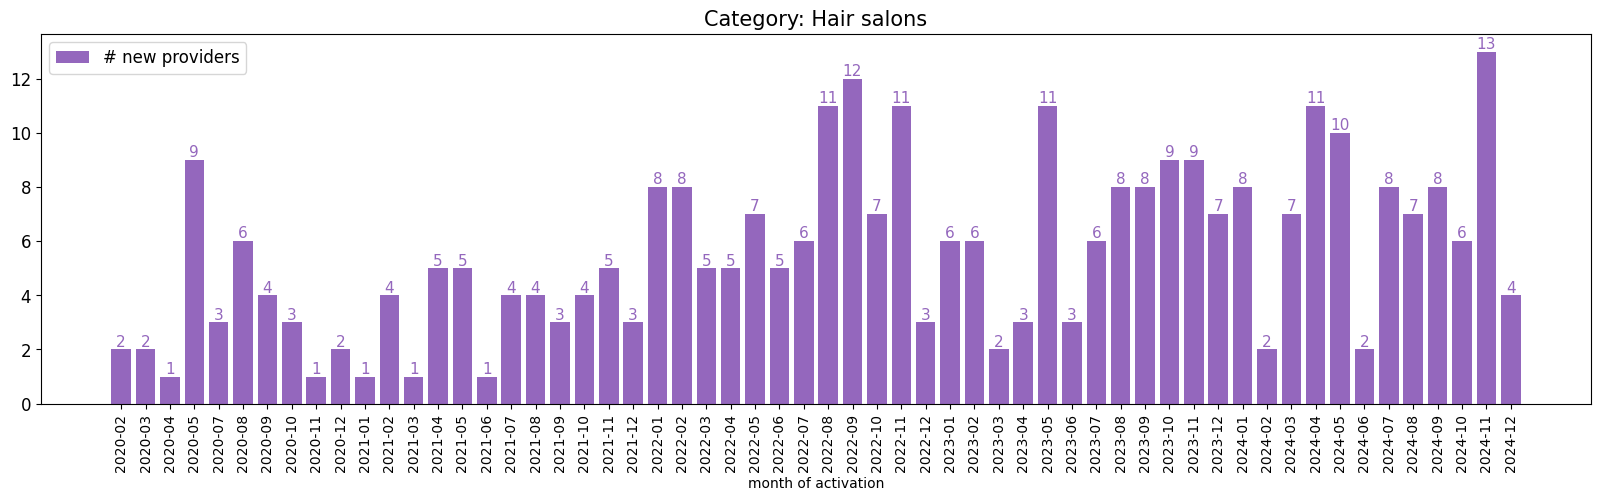

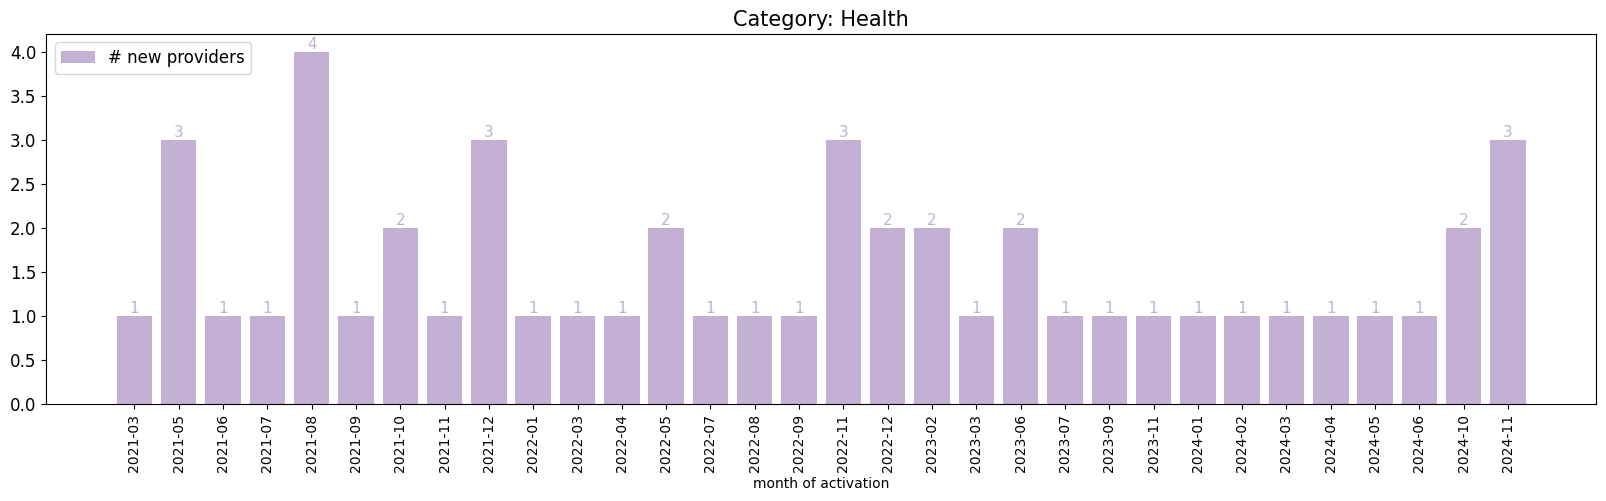

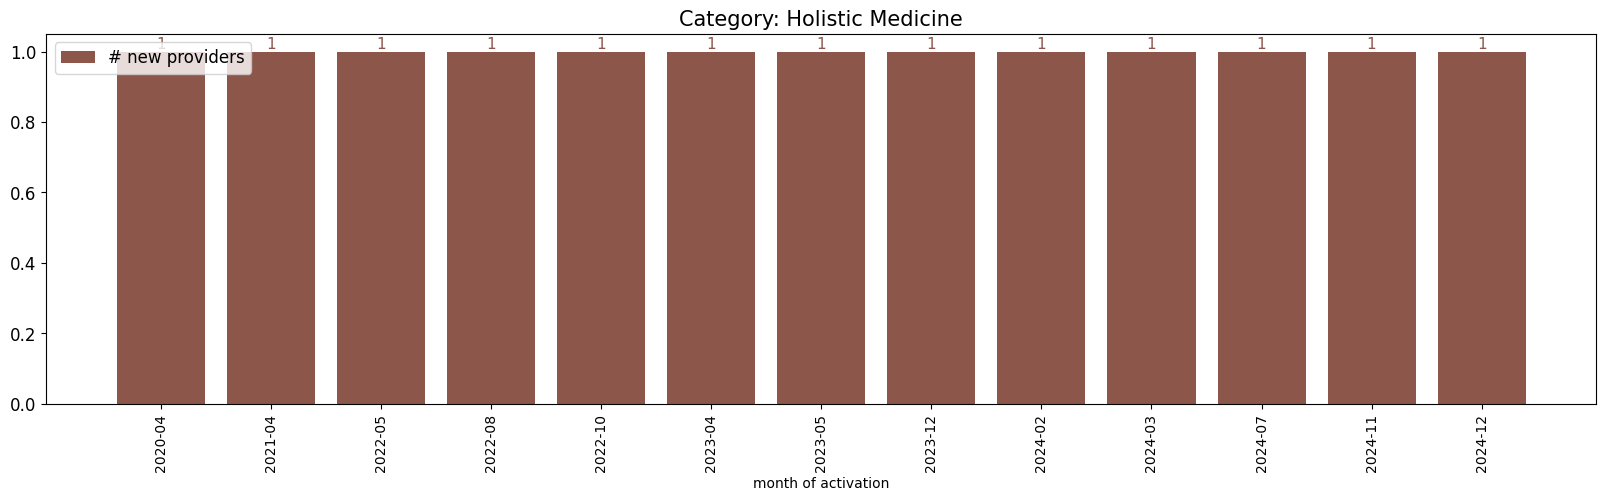

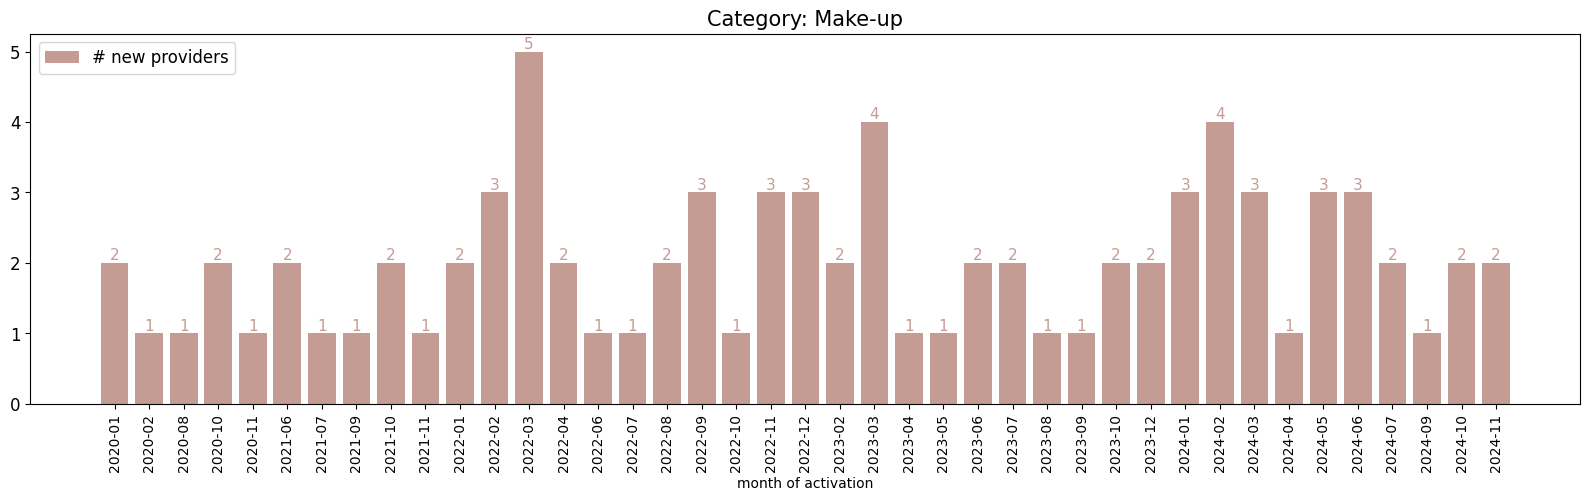

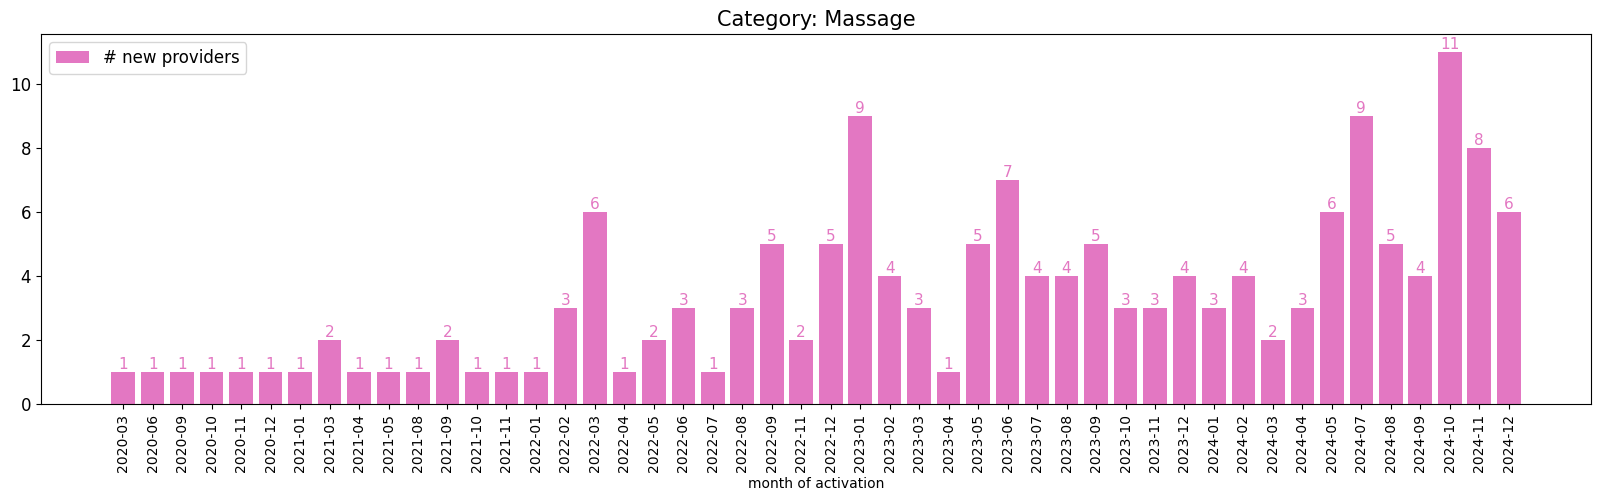

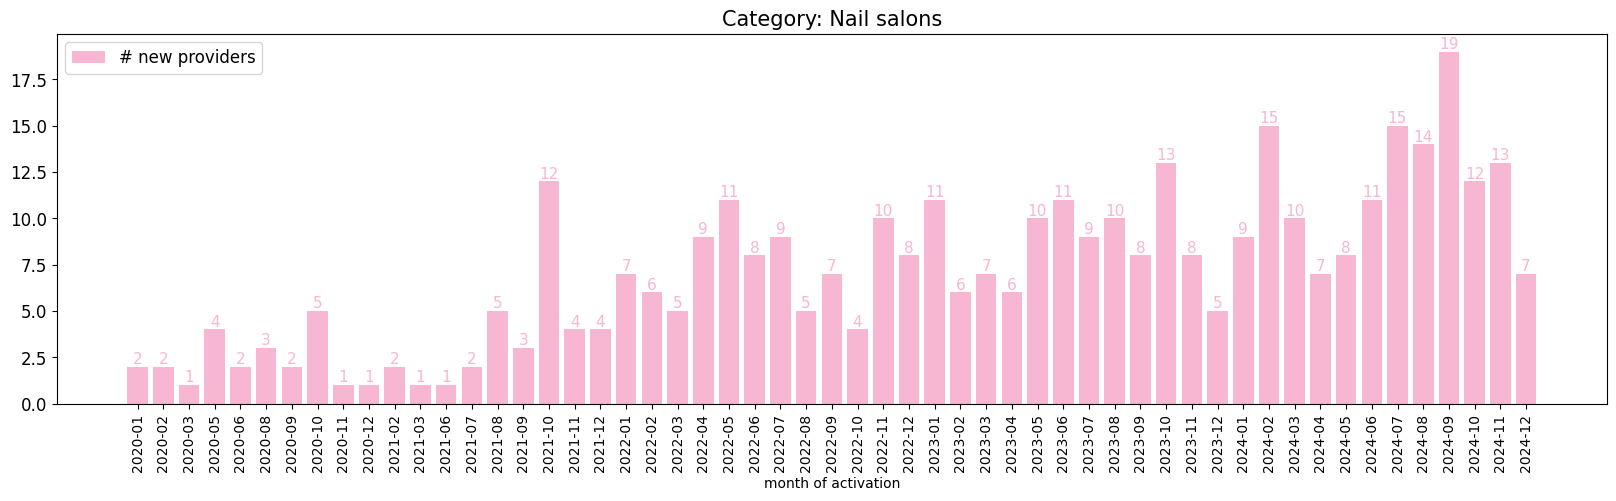

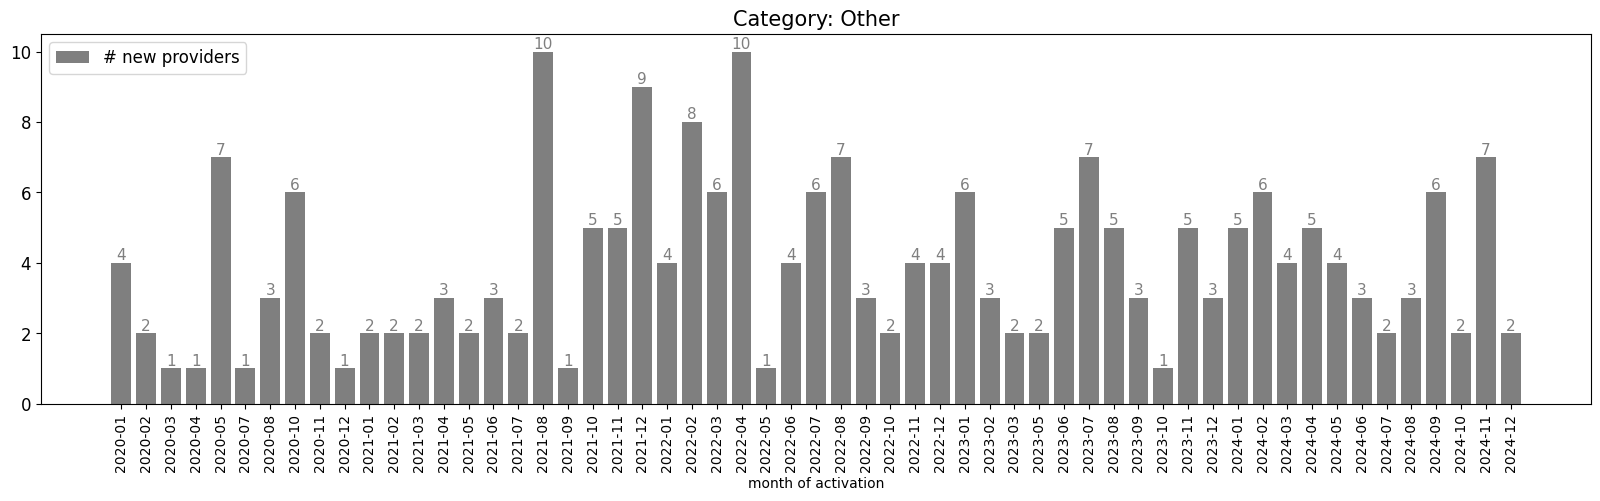

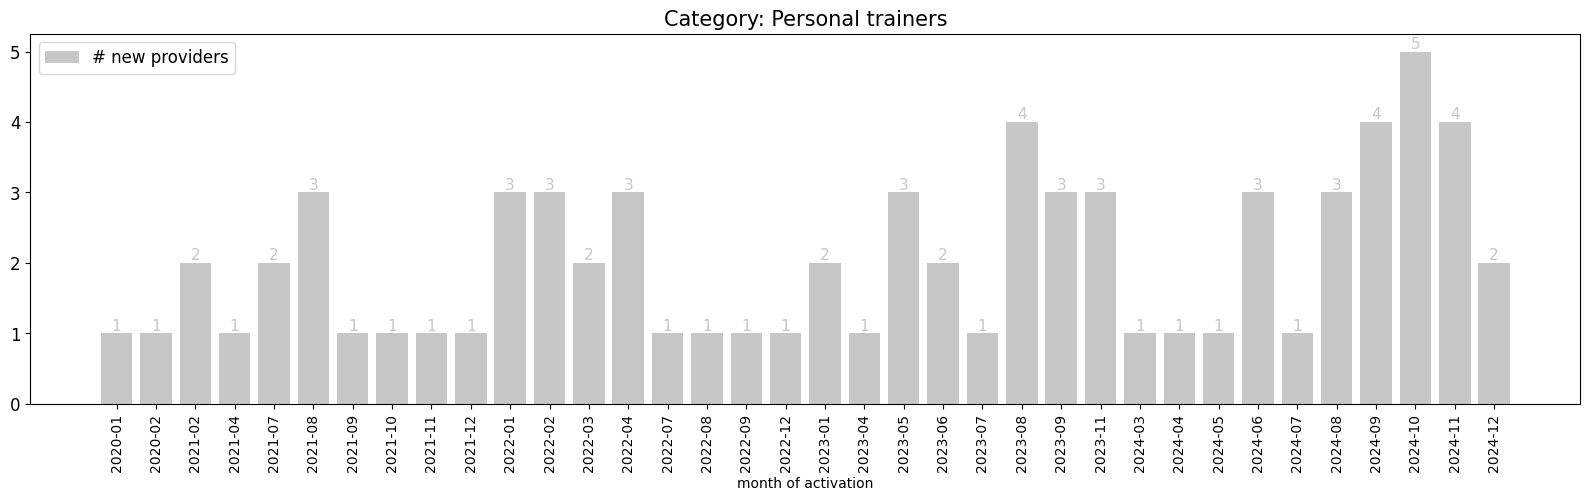

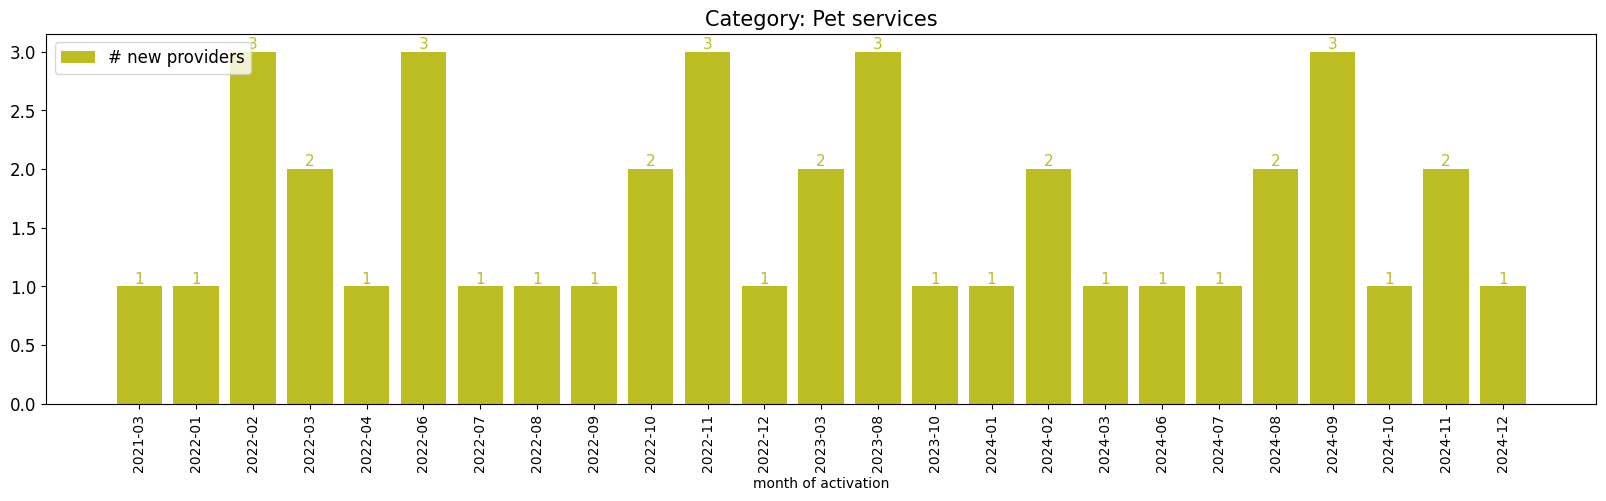

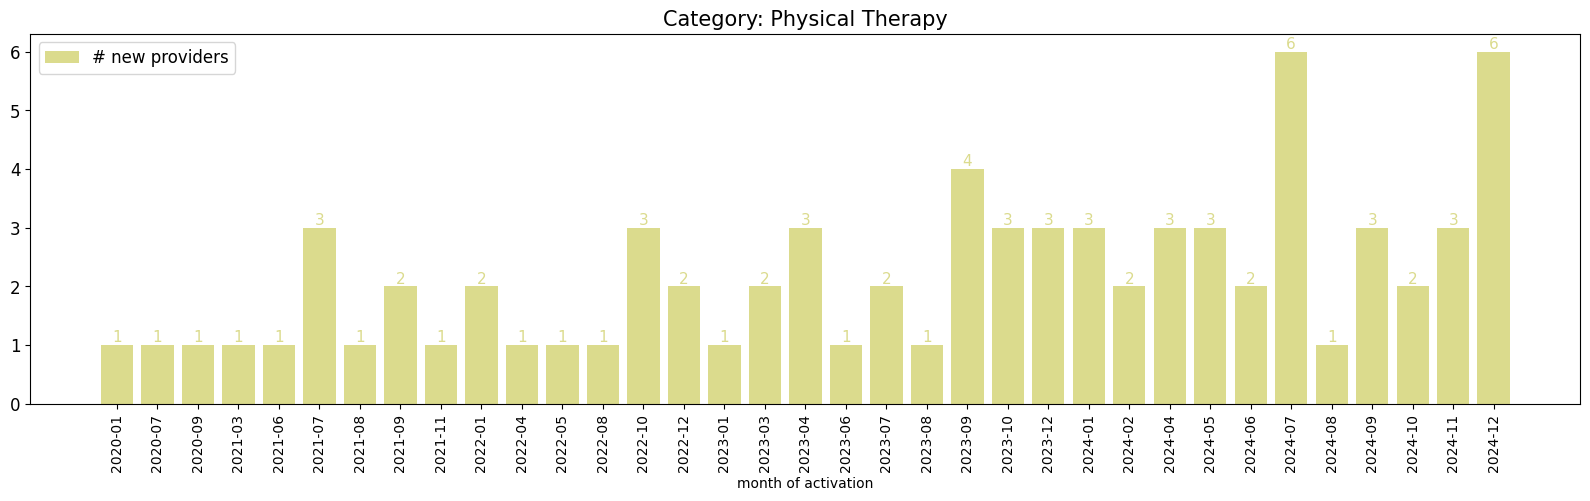

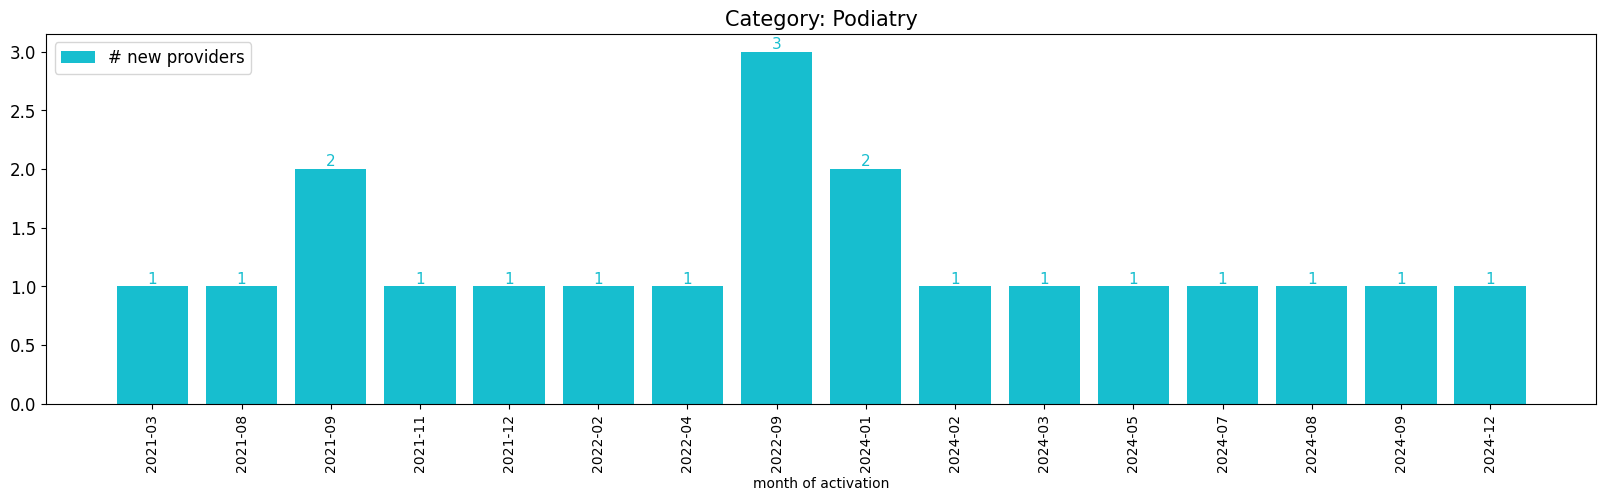

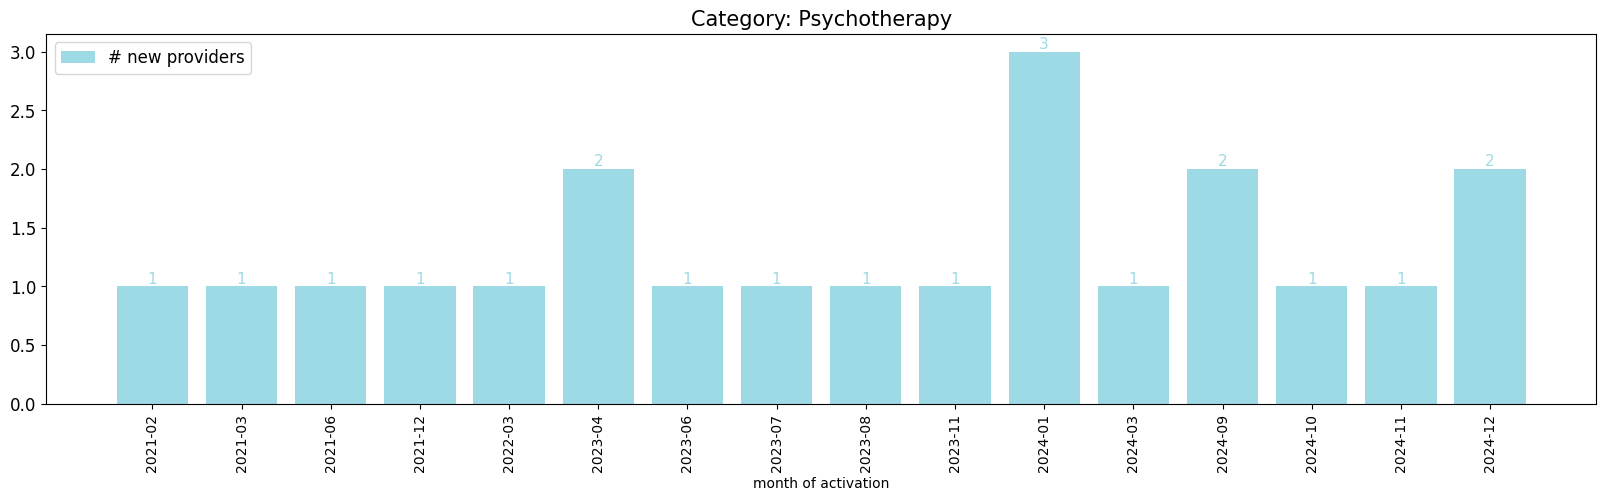

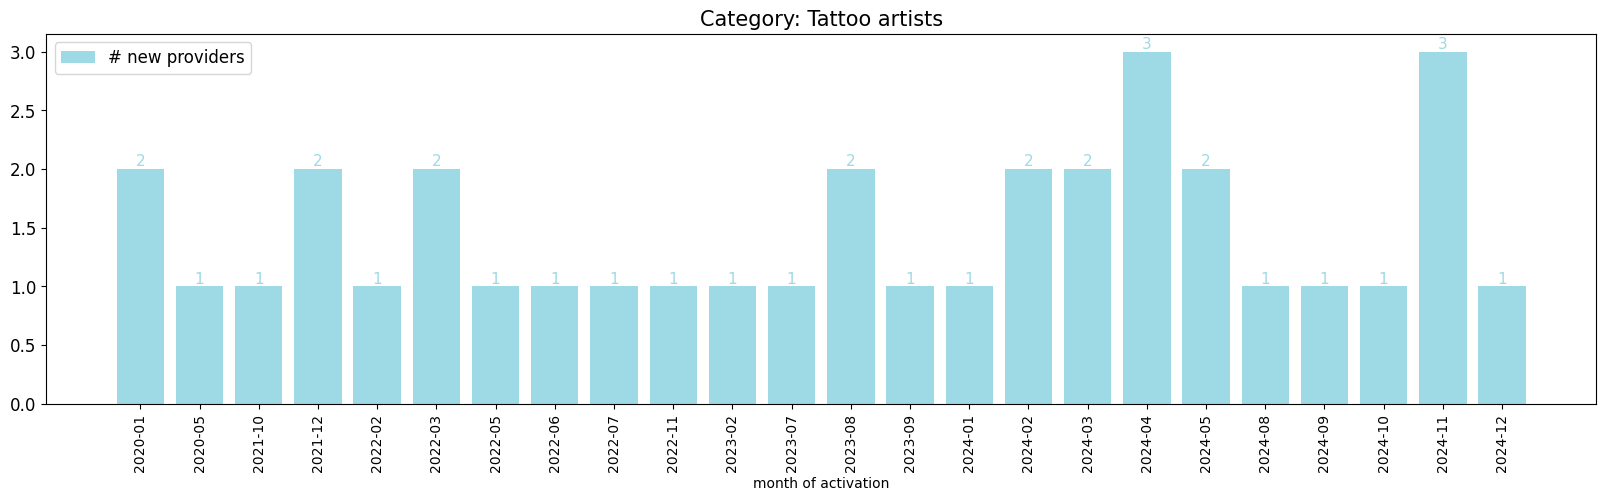

In [17]:
# bar plots for each category seperately

ac_trend_2 = activation_category_trend.groupby(['month_of_activation', 'category'])['business_identifier'].count()
ac_trend_sep = ac_trend_2.reset_index()
ac_trend_sep.set_index('month_of_activation', inplace=True)

category_list = ac_trend_sep['category'].unique()
category_list.sort()


for i in range(21):

    ac_trend_sep_for_plot = ac_trend_sep[ac_trend_sep['category']==category_list[i]]
    
    fig, ax1 = plt.subplots()
    fig.set_figwidth(20)
    
    ax1.bar(ac_trend_sep_for_plot.index, ac_trend_sep_for_plot['business_identifier'], label='# new providers', color=colors[i])
    ax1.xaxis.set_tick_params(labelsize=10, rotation=45)
    ax1.bar_label(ax1.containers[0], label_type='edge', color=colors[i], fontsize=11)
    
    ax1.set_xlabel('month of activation')
    plt.legend()
    
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=10, rotation=90)
    plt.legend(fontsize=12, loc='upper left')
    plt.title(f'Category: {category_list[i]}', fontsize=15)
    
    
    plt.show()

## Lifecycle

#### Code from BigQuery

In [18]:
# query executed in BigQuery that produced lifecycle.csv file
# """
# WITH
#     provider_dates AS (
#         SELECT
#             business_identifier,
#             MIN(PARSE_DATE('%d.%m.%Y', active_from_date)) AS first_active_from_date_parsed,
#             MIN(PARSE_DATE('%d.%m.%Y', paid_from_date)) AS first_paid_from_date_parsed,
#             MIN(PARSE_DATE('%d.%m.%Y', churn_date)) AS first_churn_date_parsed,
#         FROM
#             `sanguine-mark-421217.booksy.business`
#         WHERE
#             include_in_analysis='PRAWDA'
#         GROUP BY 1
#     ),

#     finished_appointment AS (
#         SELECT
#             business_identifier,
#             MIN(PARSE_DATE('%d.%m.%Y', created)) AS first_appointment_dt,
#             COUNT(*) AS appointment_cnt, -- I assumed that each row represents a unique appointment since there's no duplicated booking_id for the same customer_identifier
#             COUNT(DISTINCT customer_identifier) AS unique_customer_cnt,
#             SUM(total_price_adjusted) AS total_earnings
#         FROM
#             `sanguine-mark-421217.booksy.appointments`
#         WHERE
#             booking_status = 'Finished'
#         GROUP BY 1
#     )

# SELECT
#     business_identifier,
#     DATE_DIFF(DATE('2024-12-31'), first_active_from_date_parsed, DAY) AS time_on_platform, --end of 2024 chosen based on last data available in the dataset
#     DATE_DIFF(first_paid_from_date_parsed, first_active_from_date_parsed, DAY) AS time_to_paid,
#     DATE_DIFF(first_churn_date_parsed, first_active_from_date_parsed, DAY) AS time_to_churn,
#     DATE_DIFF(first_appointment_dt, first_active_from_date_parsed, DAY) AS time_to_first_appointment,
#     appointment_cnt,
#     unique_customer_cnt,
#     total_earnings
# FROM
#     provider_dates
# LEFT JOIN
#     finished_appointment USING(business_identifier)
# """

#### Statistics

In [19]:
lifecycle = pd.read_csv('lifecycle.csv', sep=',')

lifecycle['appointment_cnt'] = lifecycle['appointment_cnt'].fillna(0)
lifecycle['unique_customer_cnt'] = lifecycle['unique_customer_cnt'].fillna(0)
lifecycle['total_earnings'] = lifecycle['total_earnings'].fillna(0)

lifecycle['appointment_cnt_weighted'] = lifecycle['appointment_cnt']/lifecycle['time_on_platform']
lifecycle['unique_customer_cnt_weighted'] = lifecycle['unique_customer_cnt']/lifecycle['time_on_platform']
lifecycle['total_earnings_weighted'] = lifecycle['total_earnings']/lifecycle['time_on_platform']

display(lifecycle.info())
display(lifecycle.head())
print("\n\n", "Basic dataset statistics:", "\n")
display(lifecycle.describe())
print("\n\n", "Basic dataset statistics\033[1m only for providers with at least 1 finished appointment:\033[0;0m", "\n")
display(lifecycle[lifecycle['appointment_cnt']>0].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_identifier           2561 non-null   object 
 1   time_on_platform              2561 non-null   int64  
 2   time_to_paid                  1131 non-null   float64
 3   time_to_churn                 256 non-null    float64
 4   time_to_first_appointment     793 non-null    float64
 5   appointment_cnt               2561 non-null   float64
 6   unique_customer_cnt           2561 non-null   float64
 7   total_earnings                2561 non-null   float64
 8   appointment_cnt_weighted      2560 non-null   float64
 9   unique_customer_cnt_weighted  2560 non-null   float64
 10  total_earnings_weighted       2560 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 210.2+ KB


None

business_identifier  time_on_platform  time_to_paid  time_to_churn  \
0            1x-31911                25           NaN            NaN   
1            1x-58361               403           1.0            NaN   
2            1x-43031              1217           NaN            NaN   
3            1x-92871               650           NaN            NaN   
4            1x-00451              1174           NaN          109.0   

   time_to_first_appointment  appointment_cnt  unique_customer_cnt  \
0                        NaN              0.0                  0.0   
1                        1.0            123.0                 84.0   
2                        NaN              0.0                  0.0   
3                        NaN              0.0                  0.0   
4                        8.0              1.0                  1.0   

   total_earnings  appointment_cnt_weighted  unique_customer_cnt_weighted  \
0             0.0                  0.000000                      0.000000   
1          7960.0                  0.305211                      0.208437   
2             0.0                  0.000000                      0.000000   
3             0.0                  0.000000                      0.000000   
4            90.0                  0.000852                      0.000852   

   total_earnings_weighted  
0                 0.000000  
1                19.751861  
2                 0.000000  
3                 0.000000  
4                 0.076661



 Basic dataset statistics: 



time_on_platform  time_to_paid  time_to_churn  \
count       2561.000000   1131.000000     256.000000   
mean         684.023038     33.464191     314.324219   
std          452.493356    124.938184     282.542255   
min            0.000000      0.000000       6.000000   
25%          302.000000      3.000000     101.750000   
50%          658.000000      7.000000     219.500000   
75%         1004.000000     13.000000     433.250000   
max         1823.000000   1490.000000    1619.000000   

       time_to_first_appointment  appointment_cnt  unique_customer_cnt  \
count                 793.000000      2561.000000          2561.000000   
mean                   21.465322       241.068723            70.747364   
std                    69.614299      1154.993120           273.289278   
min                     0.000000         0.000000             0.000000   
25%                     2.000000         0.000000             0.000000   
50%                     6.000000         0.000000             0.000000   
75%                    16.000000         5.000000             4.000000   
max                  1163.000000     21148.000000          4418.000000   

       total_earnings  appointment_cnt_weighted  unique_customer_cnt_weighted  \
count    2.561000e+03               2560.000000                   2560.000000   
mean     2.208718e+04                  0.226793                      0.072414   
std      8.994930e+04                  0.883111                      0.235250   
min      0.000000e+00                  0.000000                      0.000000   
25%      0.000000e+00                  0.000000                      0.000000   
50%      0.000000e+00                  0.000000                      0.000000   
75%      6.400000e+02                  0.006505                      0.005424   
max      1.442036e+06                 12.491435                      2.811092   

       total_earnings_weighted  
count              2560.000000  
mean                 21.628602  
std                  74.420841  
min                   0.000000  
25%                   0.000000  
50%                   0.000000  
75%                   1.011751  
max                1377.302770



 Basic dataset statistics only for providers with at least 1 finished appointment: 



time_on_platform  time_to_paid  time_to_churn  \
count        793.000000    675.000000     170.000000   
mean         851.131148     22.109630     375.523529   
std          344.784108     68.697029     287.608013   
min          369.000000      0.000000      37.000000   
25%          571.000000      4.000000     138.000000   
50%          795.000000      7.000000     297.500000   
75%         1043.000000     13.000000     517.250000   
max         1823.000000    896.000000    1301.000000   

       time_to_first_appointment  appointment_cnt  unique_customer_cnt  \
count                 793.000000       793.000000           793.000000   
mean                   21.465322       778.533417           228.479193   
std                    69.614299      1973.065147           453.132074   
min                     0.000000         1.000000             0.000000   
25%                     2.000000        10.000000             7.000000   
50%                     6.000000       137.000000            80.000000   
75%                    16.000000       702.000000           239.000000   
max                  1163.000000     21148.000000          4418.000000   

       total_earnings  appointment_cnt_weighted  unique_customer_cnt_weighted  \
count    7.930000e+02                793.000000                    793.000000   
mean     7.133072e+04                  0.732143                      0.233772   
std      1.504504e+05                  1.466083                      0.375563   
min      0.000000e+00                  0.000549                      0.000000   
25%      1.565000e+03                  0.019737                      0.013129   
50%      1.930500e+04                  0.198545                      0.108241   
75%      7.517500e+04                  0.778210                      0.278068   
max      1.442036e+06                 12.491435                      2.811092   

       total_earnings_weighted  
count               793.000000  
mean                 69.822474  
std                 120.523196  
min                   0.000000  
25%                   3.104326  
50%                  26.506507  
75%                  85.903084  
max                1377.302770



 Distribution stats for time_on_platform:


count    2561.000000
mean      684.023038
std       452.493356
min         0.000000
25%       302.000000
50%       658.000000
75%      1004.000000
max      1823.000000
Name: time_on_platform, dtype: float64

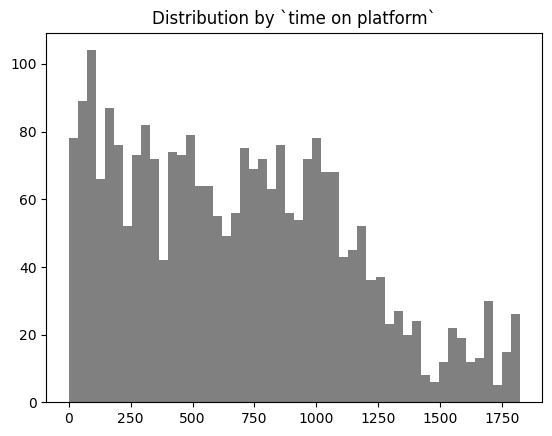

In [20]:
# statistics and histogram for provider's time on the platform in days
summary_for_metric(lifecycle, 'time_on_platform')



 Distribution stats for time_to_paid:


count     981.000000
mean       38.581040
std       133.420957
min         1.000000
25%         5.000000
50%         7.000000
75%        14.000000
max      1490.000000
Name: time_to_paid, dtype: float64

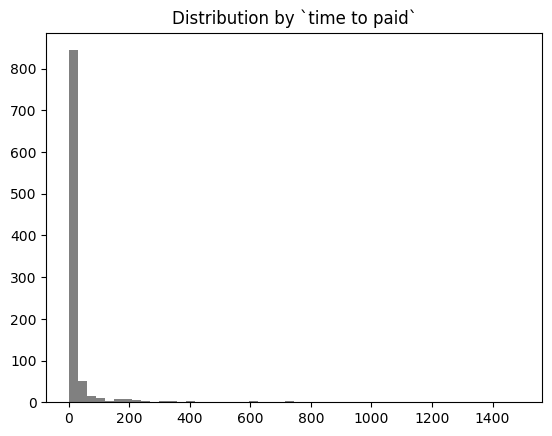

In [21]:
# statistics and histogram for provider's time from activation to first paid subscription in days
summary_for_metric(lifecycle[lifecycle['time_to_paid']>0], 'time_to_paid')



 Distribution stats for time_to_churn:


count     256.000000
mean      314.324219
std       282.542255
min         6.000000
25%       101.750000
50%       219.500000
75%       433.250000
max      1619.000000
Name: time_to_churn, dtype: float64

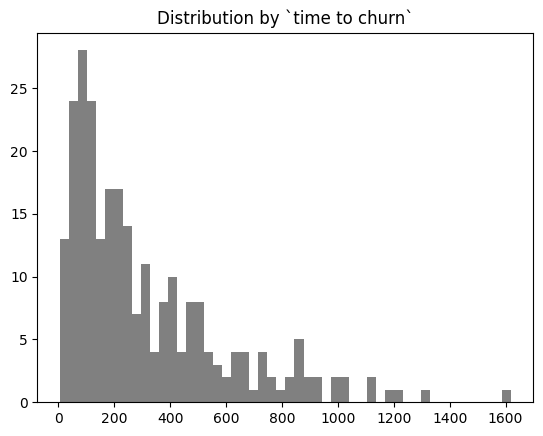

In [22]:
# statistics and histogram for provider's time from activation to churn in days
summary_for_metric(lifecycle[lifecycle['time_to_churn']>0], 'time_to_churn')



 Distribution stats for time_to_first_appointment:


count     702.000000
mean       24.247863
std        73.536960
min         1.000000
25%         3.000000
50%         7.000000
75%        18.000000
max      1163.000000
Name: time_to_first_appointment, dtype: float64

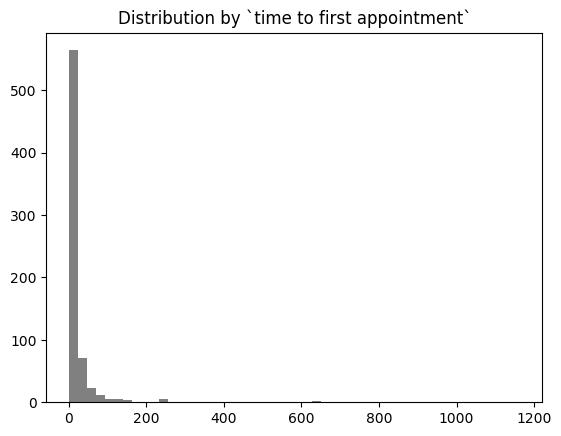

In [23]:
# statistics and histogram for provider's time from activation to first appointment in days
summary_for_metric(lifecycle[lifecycle['time_to_first_appointment']>0], 'time_to_first_appointment')

#### Structure

In [24]:
# providers structure based on their time on the platform
conditions = [
    (lifecycle['time_on_platform'] <= 30),
    (lifecycle['time_on_platform'] > 30) & (lifecycle['time_on_platform'] <= 90),
    (lifecycle['time_on_platform'] > 90) & (lifecycle['time_on_platform'] <= 180),
    (lifecycle['time_on_platform'] > 180) & (lifecycle['time_on_platform'] <= 360),
    (lifecycle['time_on_platform'] > 360)
]

values = ['<=30', '31 - 90', '91 - 180', '181 - 360', '360+']

lifecycle['time_on_platform_gr'] = np.select(conditions, values, '')
lifecycle['time_on_platform_gr'] = pd.Categorical(lifecycle['time_on_platform_gr'], values)
lifecycle_group = lifecycle.groupby(['time_on_platform_gr']).business_identifier.agg(['count'])
lifecycle_group['% providers count'] = lifecycle_group['count'] / lifecycle_group['count'].sum()
lifecycle_group.rename(columns={'count':'providers count'}, inplace=True)

lifecycle_group.style \
  .format({'% providers count':'{:.2%}'}, 
          thousands=","
         ) 

<ipython-input-24-f10f71e9322f>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lifecycle_group = lifecycle.groupby(['time_on_platform_gr']).business_identifier.agg(['count'])


In [25]:
# Providers structured based on their time to the first appointment
conditions = [
    (lifecycle['appointment_cnt'] == 0),
    (lifecycle['time_to_first_appointment'] <= 1),
    (lifecycle['time_to_first_appointment'] > 1) & (lifecycle['time_to_first_appointment'] <= 7),
    (lifecycle['time_to_first_appointment'] > 7) & (lifecycle['time_to_first_appointment'] <= 30),
    (lifecycle['time_to_first_appointment'] > 30) & (lifecycle['time_to_first_appointment'] <= 90),
    (lifecycle['time_on_platform'] > 90)
]

values = ['no appointment', 'first day', '2 - 7', '8 - 30', '31 - 90', '90+']

lifecycle['time_to_first_appointment_gr'] = np.select(conditions, values, '')
lifecycle['time_to_first_appointment_gr'] = pd.Categorical(lifecycle['time_to_first_appointment_gr'], values)
lifecycle_group = lifecycle.groupby(['time_to_first_appointment_gr']).business_identifier.agg(['count'])
lifecycle_group['% providers count'] = lifecycle_group['count'] / lifecycle_group['count'].sum()
lifecycle_group.rename(columns={'count':'providers count'}, inplace=True)

lifecycle_group.style \
  .format({'% providers count':'{:.2%}'}, 
          thousands=","
         ) 

<ipython-input-25-e03f67e33fc4>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lifecycle_group = lifecycle.groupby(['time_to_first_appointment_gr']).business_identifier.agg(['count'])


#### Correlations

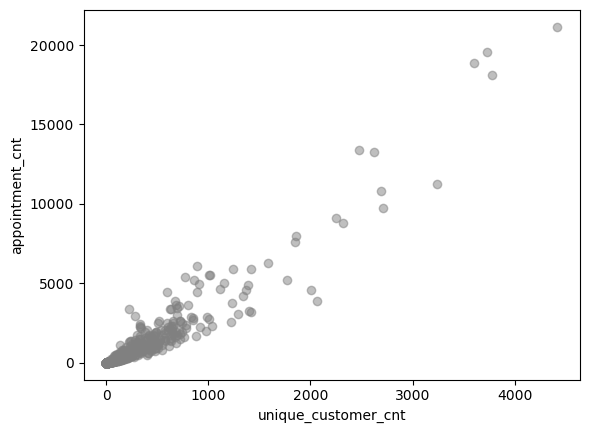

Corr:  0.95649  p-value:  0.0


In [26]:
# correlation between time on platform and number of appointments
calculate_correlation(lifecycle[lifecycle['appointment_cnt']>0], 'unique_customer_cnt', 'appointment_cnt')

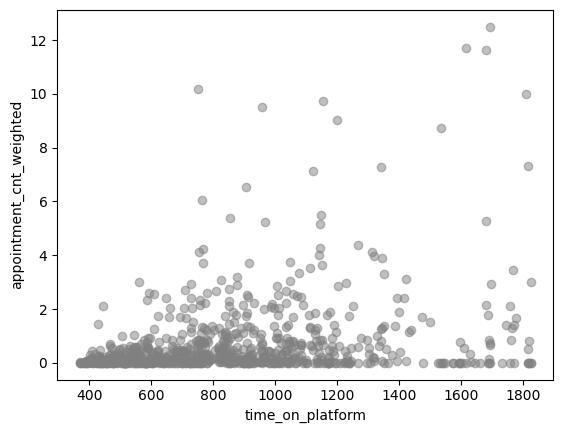

Corr:  0.30778  p-value:  0.0


In [27]:
# correlation between time on platform and number of appointments weighted by time on platform (average daily number of appointments)
calculate_correlation(lifecycle[lifecycle['appointment_cnt']>0], 'time_on_platform', 'appointment_cnt_weighted')

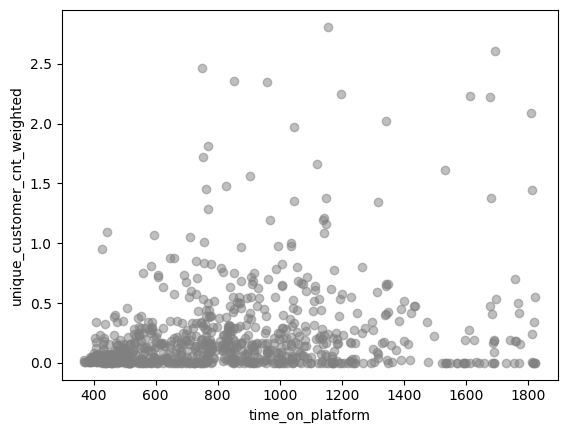

Corr:  0.22818  p-value:  0.0


In [28]:
# correlation between time on platform and number of customers weighted by time on platform (average daily number of customers)
calculate_correlation(lifecycle[lifecycle['appointment_cnt']>0], 'time_on_platform', 'unique_customer_cnt_weighted')

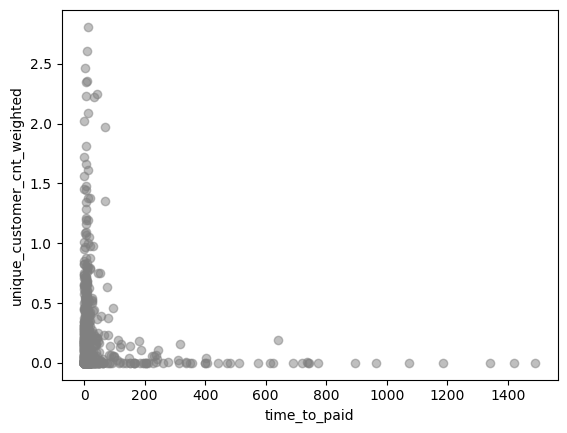

Corr:  -0.07886  p-value:  0.00797


In [29]:
# correlation between time to paid subscribtion and number of customers weighted by time on platform (average daily number of customers)
calculate_correlation(lifecycle[lifecycle['time_to_paid'].isnull()==False], 'time_to_paid', 'unique_customer_cnt_weighted')

There is but a very weak correlation between time to paid subscription and the number of customers.

## Multi-category providers

Providers that operate in more than one category account for less than 1 percent of all providers so further insights can't be generalized, but I wanted to calculate the potential of business growth in the case of category connections.

#### Code from BigQuery

In [30]:
# # query executed in BigQuery that produced multicat_business.csv
# """
#     WITH
#         base AS (
#             SELECT
#                 *
#             FROM
#                 `sanguine-mark-421217.booksy.business`
#             WHERE
#                 include_in_analysis='PRAWDA'
#         ),

#         providers_categories AS (
#                 SELECT
#                     base.category AS c,
#                     base_2.category AS c1,
#                     COUNT(DISTINCT base.business_identifier) AS provider_cntd
#                 FROM
#                     base
#                 INNER JOIN
#                     base base_2
#                 ON
#                     base.business_identifier = base_2.business_identifier
#                     AND base.category > base_2.category
#                 GROUP BY
#                     ALL
#         ),

#         pivoted AS (
#             SELECT 
#                 * 
#             FROM 
#                 providers_categories
#             PIVOT (SUM(provider_cntd) FOR c1 IN ('Aesthetic Medicine','Automotive','Barbers','Beauty salon','Brows & Lashes','Dental','Hair Removal','Hair salons','Health','Holistic Medicine','Make-up','Massage','Nail salons','Other','Personal trainers','Pet services','Physical Therapy','Podiatry','Psychotherapy','Tattoo artists'))
#             ORDER BY 1
#         ),

#         all_categories_list AS (
#           SELECT DISTINCT
#           category AS c
#           FROM
#               base
#         )

# SELECT
#     *
# FROM
#     all_categories_list
# LEFT JOIN
#     pivoted USING(c)
# """

#### Structure

In [31]:
# structure of providers per category count
category_cnt_gr = business_ofa.groupby('business_identifier', as_index=False).agg(category_cnt_per_provider = ('category', 'nunique'))

category_cnt_struct = category_cnt_gr.groupby('category_cnt_per_provider', as_index=False).agg(provider_cnt = ('business_identifier', 'nunique'))
category_cnt_struct['share'] = category_cnt_struct['provider_cnt'] / category_cnt_struct['provider_cnt'].sum()

display(category_cnt_struct
            .style
            .hide(axis="index")
            .format({'share':'{:.2%}'},
                    thousands=","
                   )
       )

#### Cross categories

Which categories are commonly mixed:

In [32]:
multicat_business = pd.read_csv('multicat_business.csv', sep=',')
multicat_business = multicat_business.fillna(0)

multicat_business[categories] = multicat_business[categories].map(lambda n: '{:,.0f}'.format(n))

multicat_business.sort_values('c')\
    .style.hide(axis='index')\
    .set_properties(**{'background-color': 'white'})\
    .set_properties(subset='c', **{'font-weight': 'bold'})\
    .background_gradient(cmap=greys_cmap, subset=multicat_business.columns[1:], vmin=0, vmax=3)\
    .set_table_styles([dict(selector="th.col_heading", props=[("writing-mode", "vertical-rl"),
                                                              ('transform', 'rotateZ(360deg)'), 
                                                              ('height', '150px')])],
                      axis=1
                     )\
    .set_properties(subset=multicat_business.columns[1:], **{"color": "whitesmoke"})\
    .set_properties(subset=multicat_business.columns[0], **{'width': '150px'})

# CUSTOMERS

In [33]:
appointments = pd.read_csv('appointments.csv', sep=';')

# datetime type columns
appointments['created_dt'] = pd.to_datetime(appointments['created'], format='%d.%m.%Y')

display(appointments.info())
display(appointments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839792 entries, 0 to 839791
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   created               839792 non-null  object        
 1   business_identifier   839792 non-null  object        
 2   booking_id            839792 non-null  object        
 3   customer_identifier   834132 non-null  object        
 4   booking_status        839792 non-null  object        
 5   total_price_adjusted  839791 non-null  float64       
 6   booking_source        839792 non-null  object        
 7   service_identifier    837888 non-null  object        
 8   created_dt            839792 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 35.2+ MB


None

created business_identifier  booking_id customer_identifier  \
0  09.02.2021            1x-97041  2x-2530732           4x-655464   
1  01.02.2021            1x-97041  2x-1991854            4x-93391   
2  16.02.2021            1x-97041  2x-3064086           4x-669953   
3  10.02.2021            1x-98451  2x-2638476           4x-548527   
4  21.02.2021            1x-98451  2x-3333853           4x-310145   

  booking_status  total_price_adjusted booking_source service_identifier  \
0       Finished                280.00            Web           3x-46656   
1       Finished                135.00            Web           3x-46663   
2      Cancelled                  0.01        Android          3x-022025   
3        No-show                280.00         iPhone           3x-48702   
4      Cancelled                190.00        Android           3x-48690   

  created_dt  
0 2021-02-09  
1 2021-02-01  
2 2021-02-16  
3 2021-02-10  
4 2021-02-21

In [34]:
# trends for appointments
query = """
    WITH
        doubled_b_id AS (
            SELECT
                business_identifier
            FROM
                business
            WHERE
                include_in_analysis = 'PRAWDA'
            GROUP BY 1
            HAVING
                COUNT(*)>1
        ),
        
        business_in_analysis AS (
            SELECT DISTINCT
                business_identifier,
                category
            FROM
                business
            WHERE
                include_in_analysis = 'PRAWDA'
                AND business_identifier NOT IN (SELECT business_identifier FROM doubled_b_id) --excluding providers with many categories
        ),

        appointments_cat AS (
            SELECT
                STRFTIME('%Y-%m', created_dt) AS month_of_appointment,
                business_identifier,
                customer_identifier,
                category,
                total_price_adjusted,
                COUNT(*) OVER (PARTITION BY business_identifier) AS total_appoint,
                SUM(total_price_adjusted) OVER (PARTITION BY business_identifier) AS total_earnings
            FROM
                appointments
            JOIN
                business_in_analysis USING(business_identifier)
            WHERE
                booking_status='Finished'
        )

    SELECT
        COALESCE(month_of_appointment, '_TOTAL') AS month_of_appointment,
        COALESCE(category, '_TOTAL') AS category,
        app_cnt,
        customer_cnt,
        earnings,
        avg_app_cnt,
        avg_earnings
    FROM (
        SELECT
            month_of_appointment,
            category,
            COUNT(*) AS app_cnt,
            COUNT(DISTINCT customer_identifier) AS customer_cnt,
            SUM(total_price_adjusted) AS earnings,
            AVG(total_appoint) AS avg_app_cnt,
            AVG(total_earnings) AS avg_earnings
        FROM
            appointments_cat
        GROUP BY
            CUBE(1, 2)
    )

"""

appointments_trend = duckdb.query(query).df()


#### Statistics for appointments per category:

In [35]:
appointments_stats = appointments_trend.loc[(appointments_trend['month_of_appointment']=='_TOTAL') & (appointments_trend['category']!='_TOTAL')]
appointments_stats.set_index('month_of_appointment', inplace=True)
total_category = appointments_trend.loc[(appointments_trend['month_of_appointment']=='_TOTAL') & (appointments_trend['category']=='_TOTAL')]
total_category.set_index('month_of_appointment', inplace=True)

appointments_stats_joined = appointments_stats.join(total_category, rsuffix='_tot')

appointments_stats_joined['% appointments'] = appointments_stats_joined['app_cnt'] / appointments_stats_joined['app_cnt_tot']
appointments_stats_joined['% customers'] = appointments_stats_joined['customer_cnt'] / appointments_stats_joined['customer_cnt_tot']
appointments_stats_joined['% earnings sum'] = appointments_stats_joined['earnings'] / appointments_stats_joined['earnings_tot']

new_columnnames = {'app_cnt': '# of appointments', 
                  'customer_cnt': '# of customers',
                  'earnings': 'earnings sum',
                  'avg_app_cnt': 'average # of appointments',
                  'avg_earnings': 'average earnings sum'
                 }

display(appointments_stats_joined[['category', 'app_cnt', '% appointments', 'customer_cnt', '% customers', 'earnings', '% earnings sum', 'avg_app_cnt', 'avg_earnings']]
    .rename(new_columnnames, axis=1)
    .sort_values(by='category')
    .style
    .hide(axis='index')
    .format({'# of appointments':'{:,}', 
             '% appointments':'{:.1%}', 
             '# of customers':'{:,}', 
             '% customers':'{:.1%}', 
             'earnings sum':'{:,.2f}', 
             '% earnings sum':'{:.1%}', 
             'average # of appointments':'{:,.0f}', 
             'average earnings sum':'{:,.2f}'
            }
                   )
)


#### Appointments, customers, and earnings trend per category

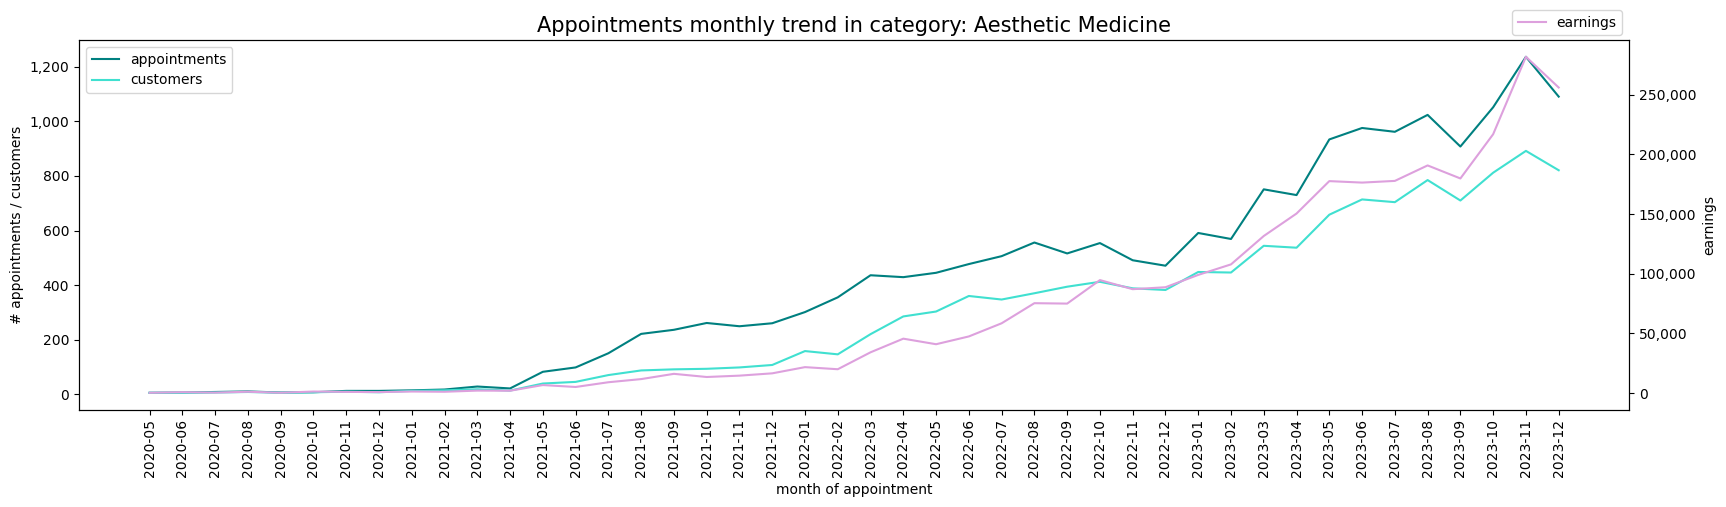

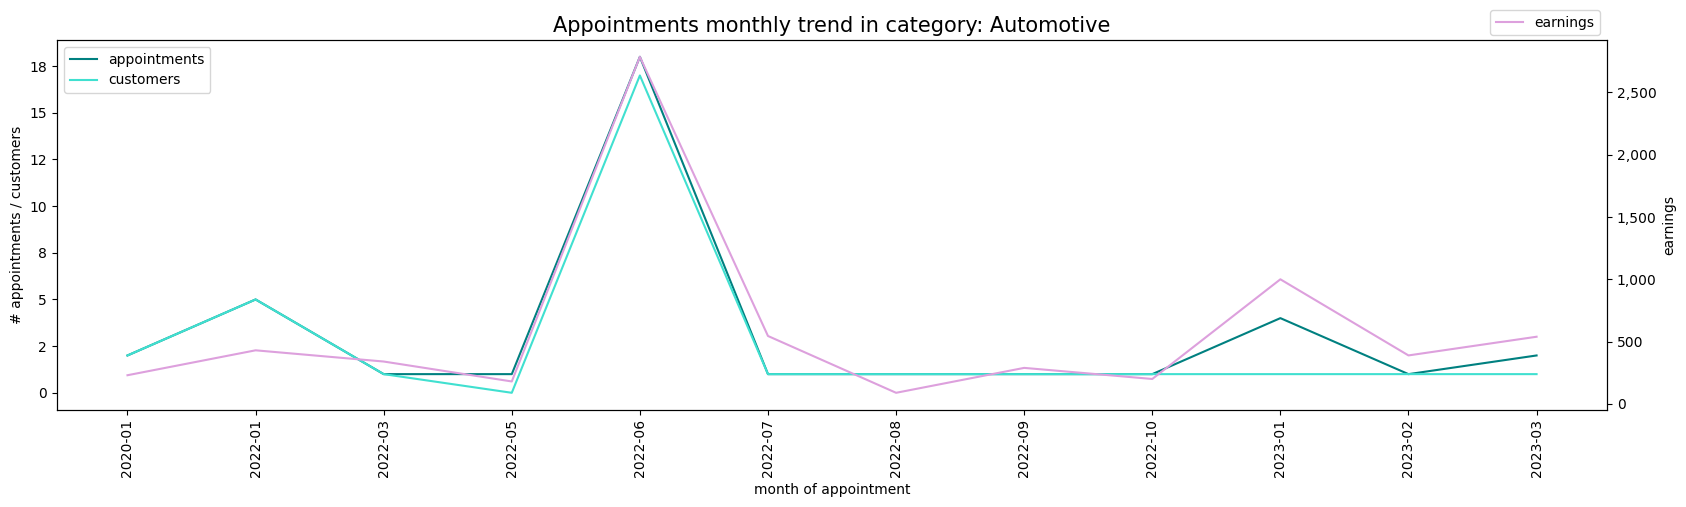

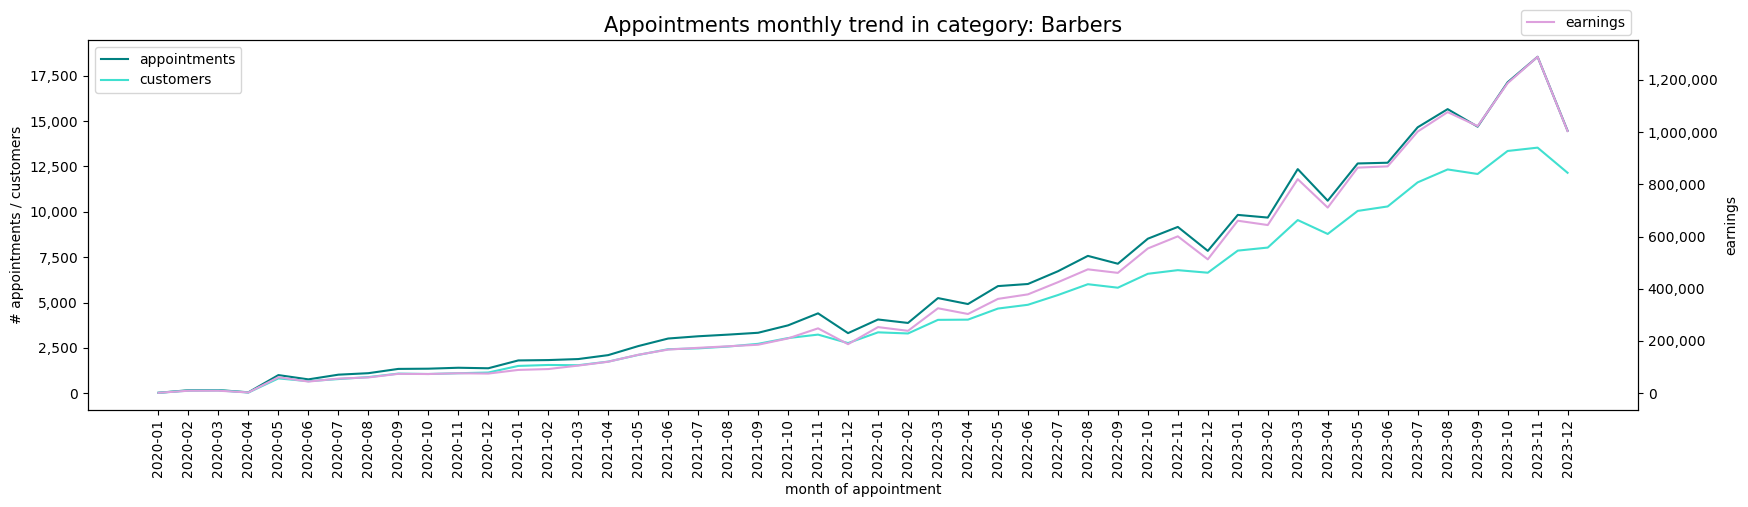

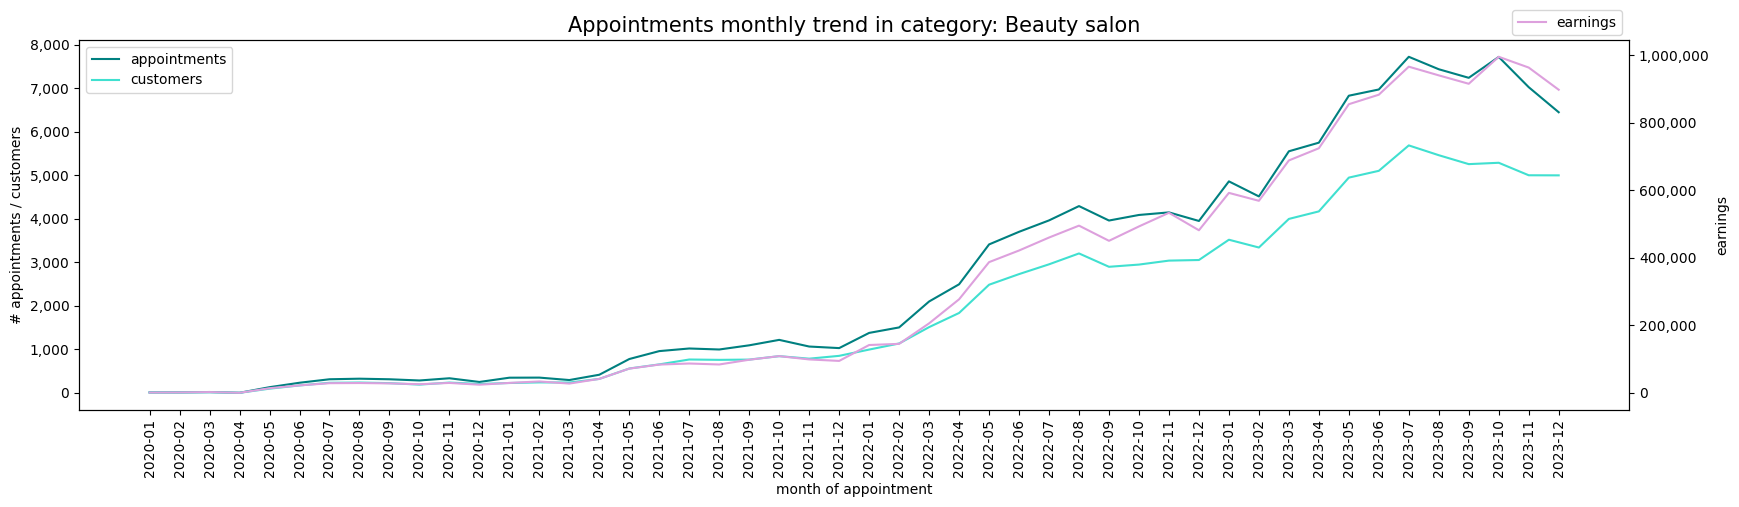

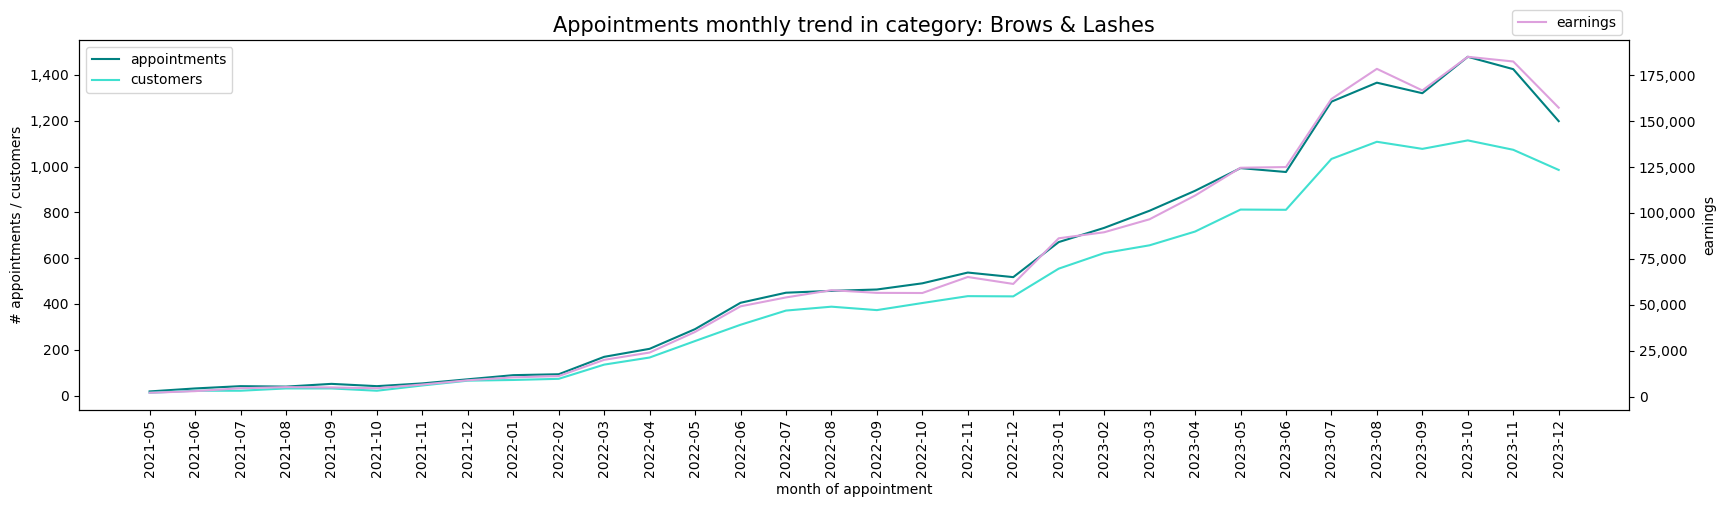

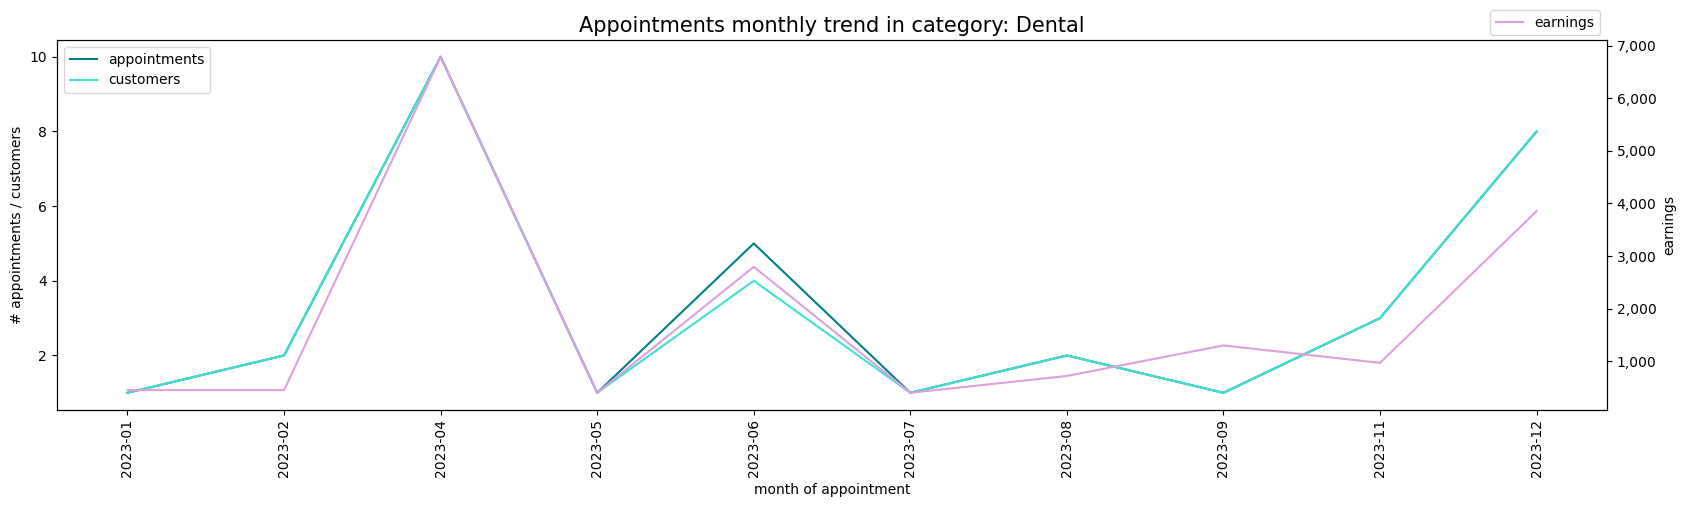

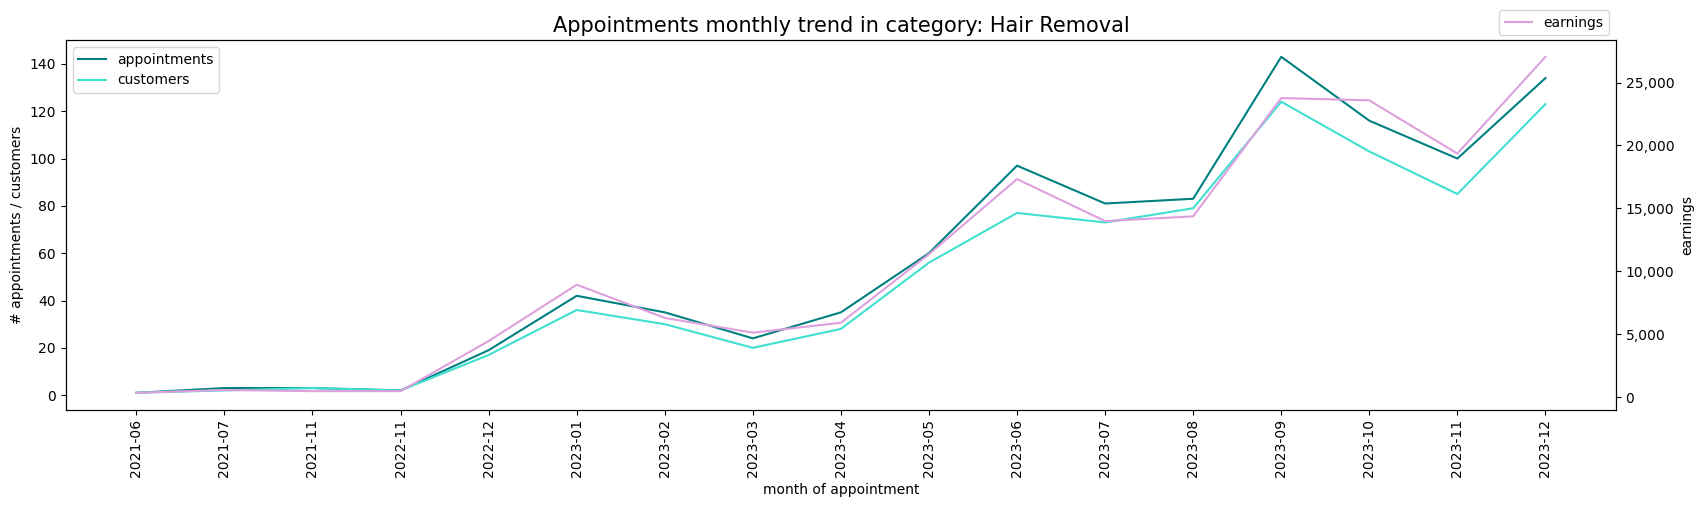

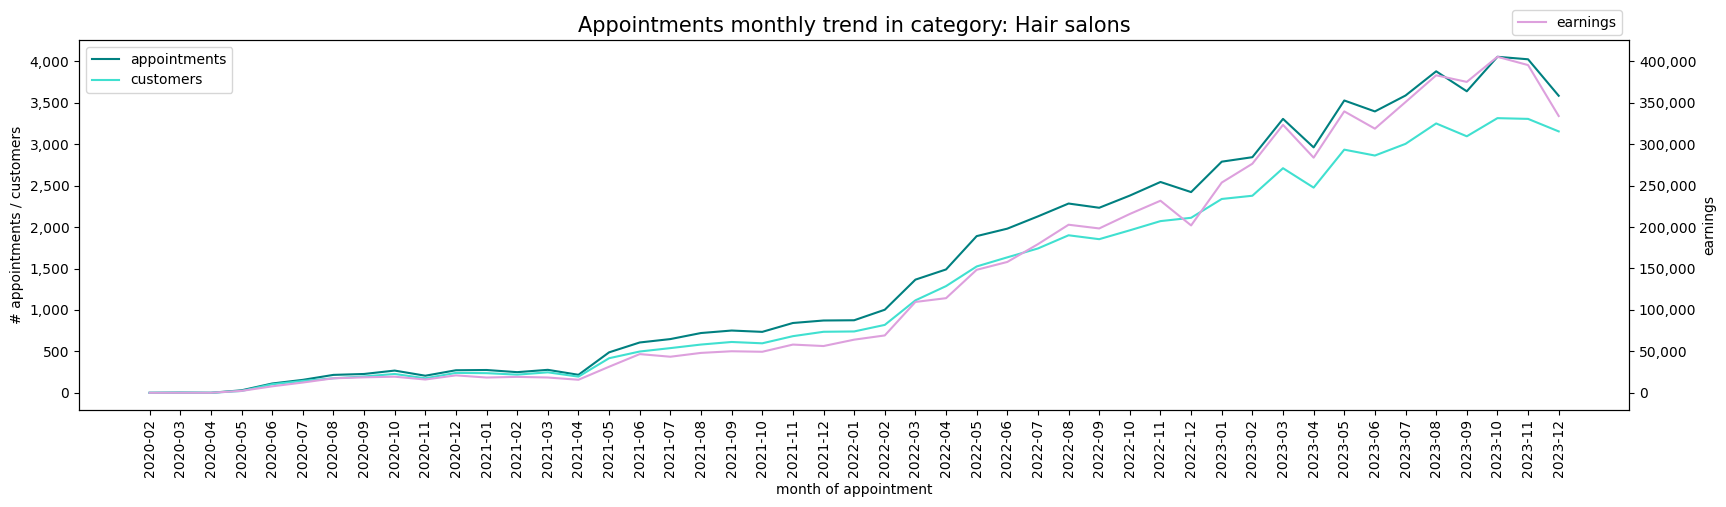

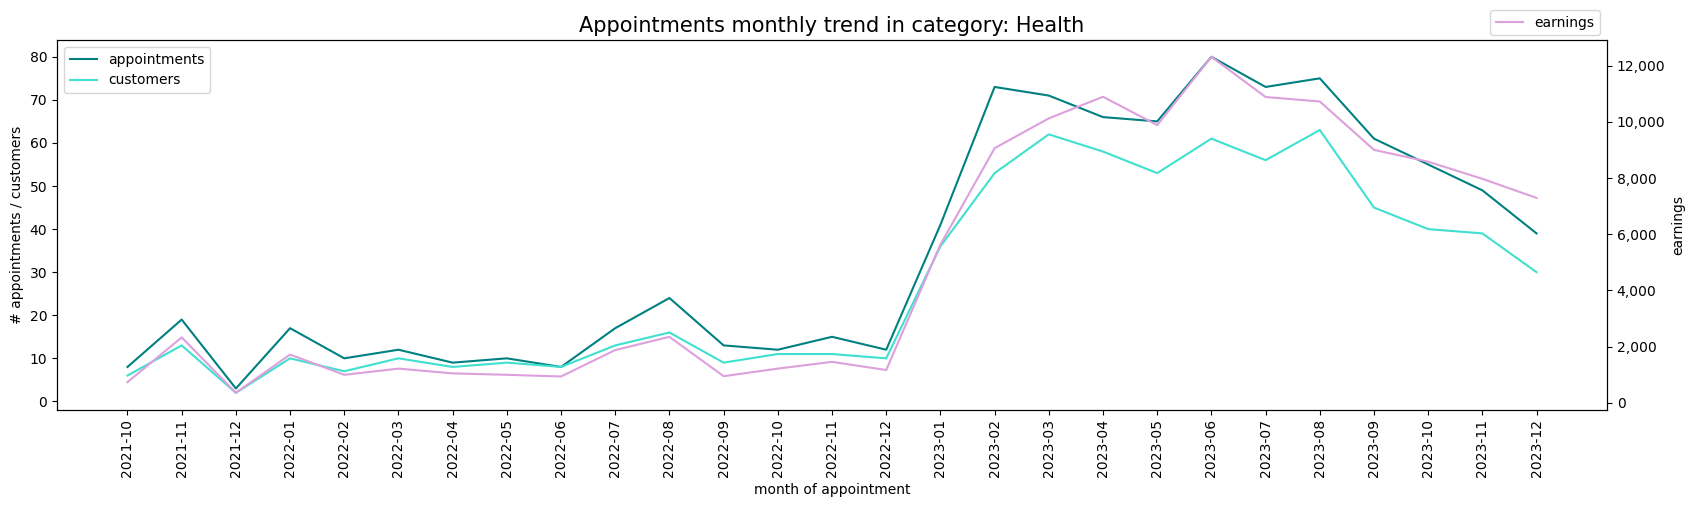

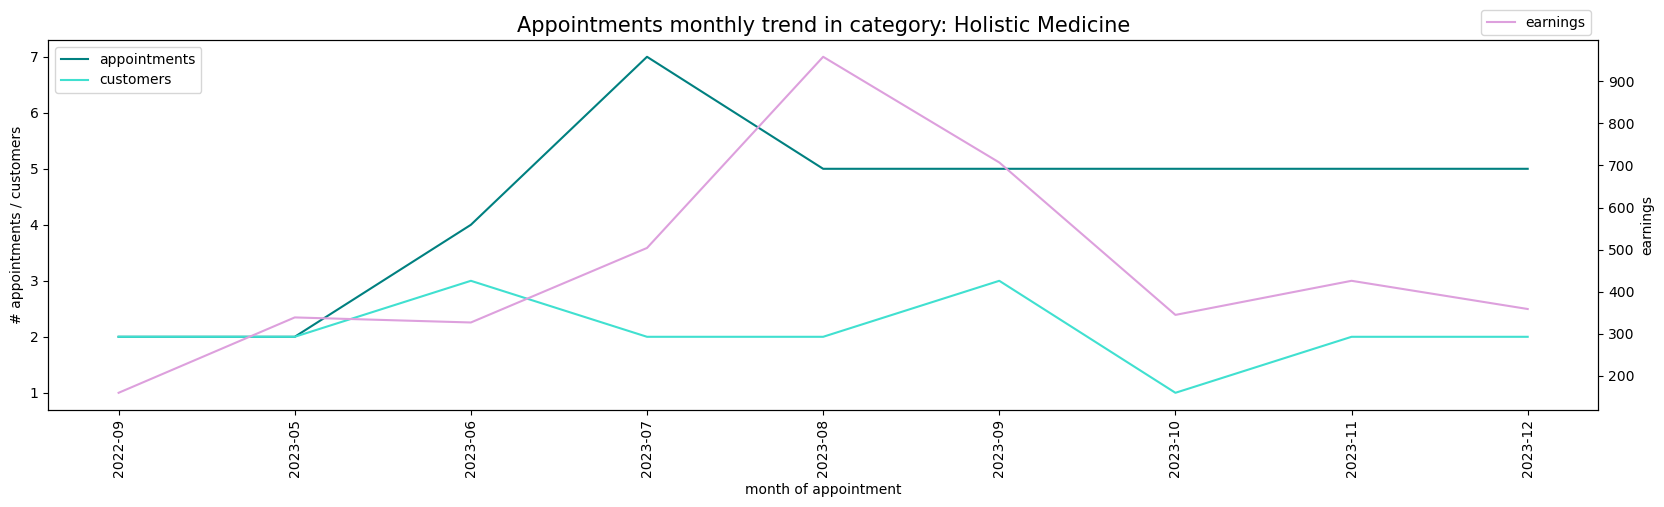

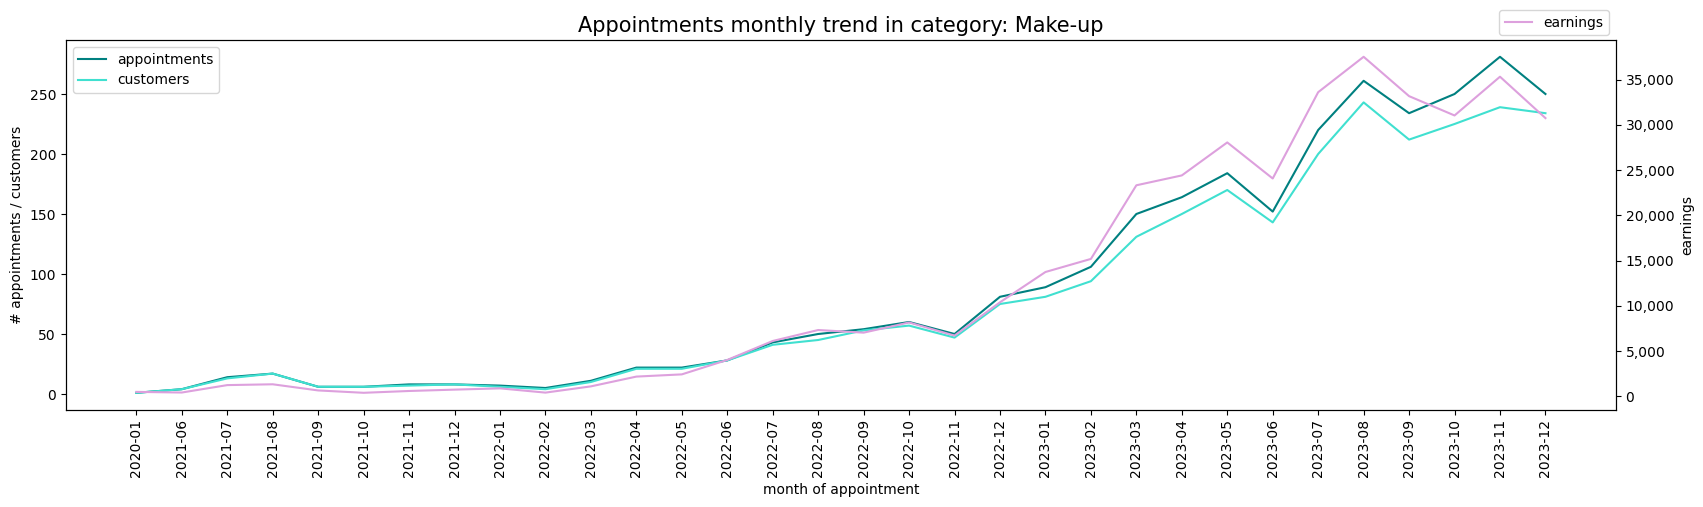

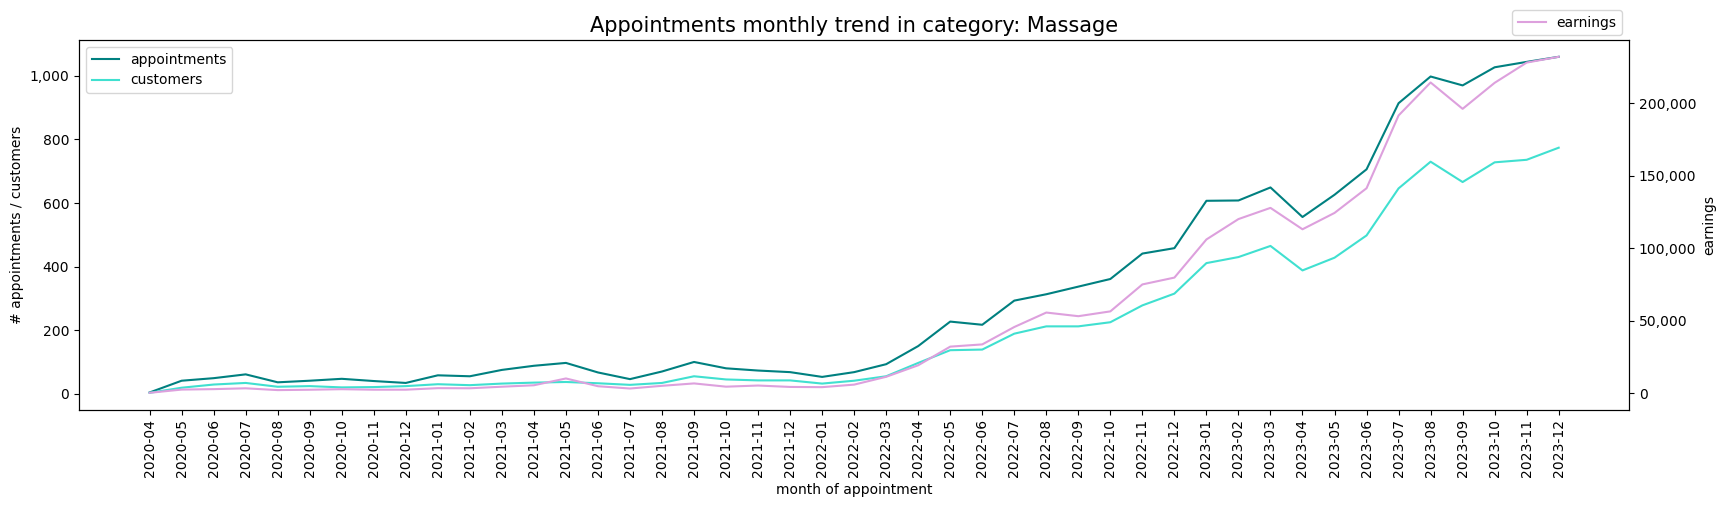

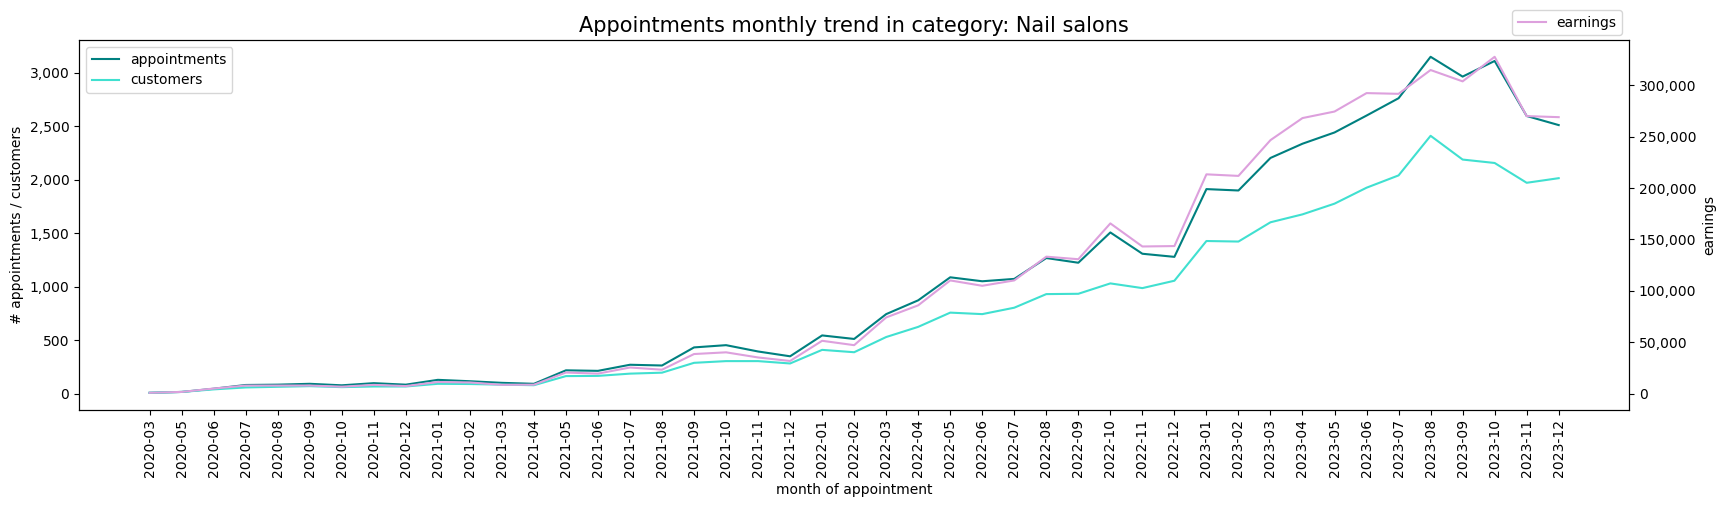

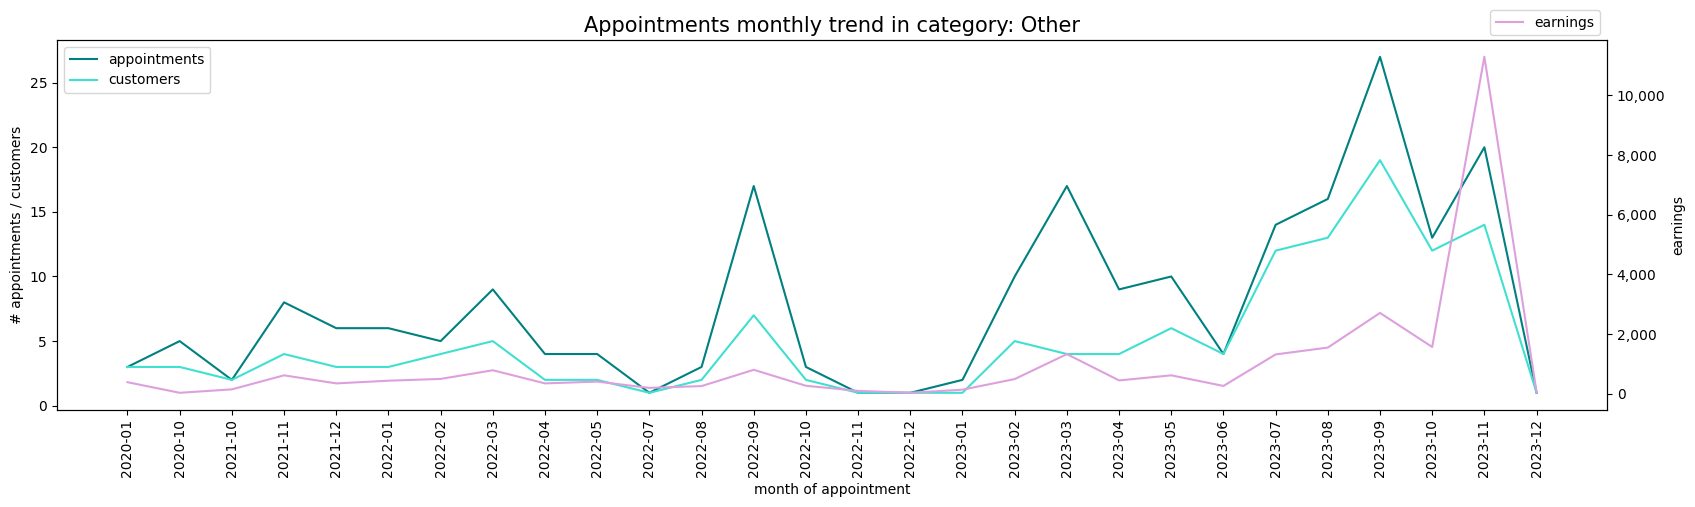

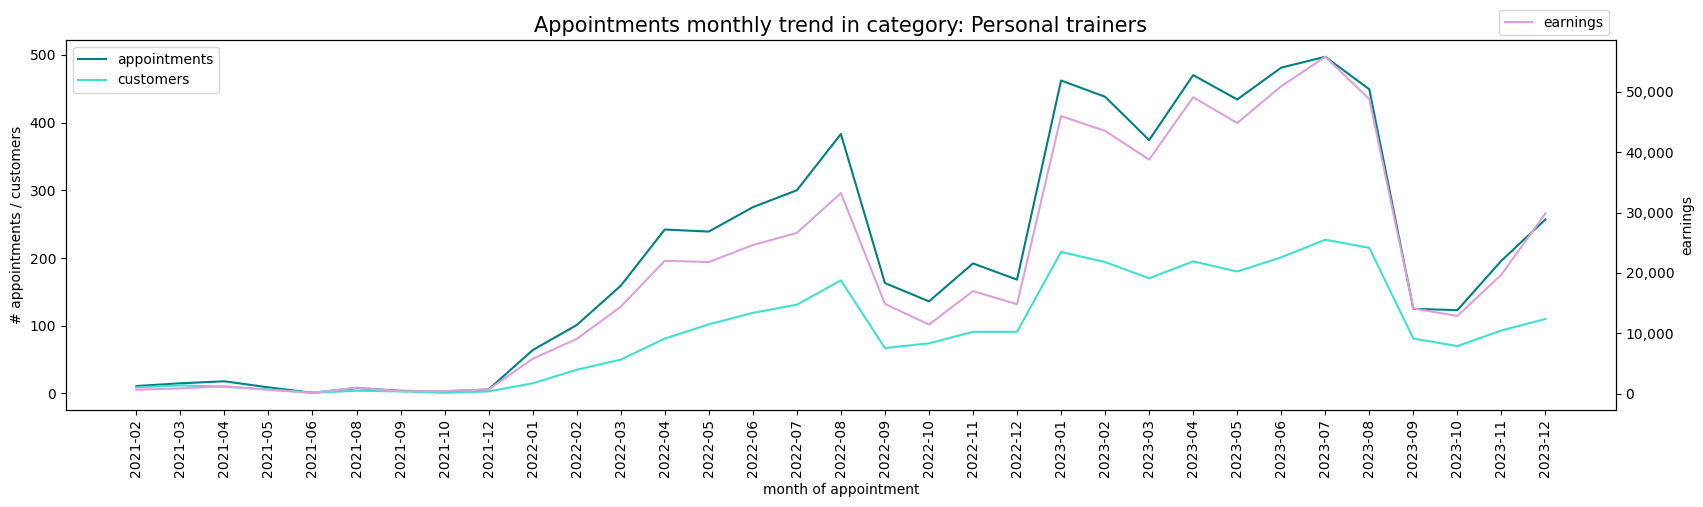

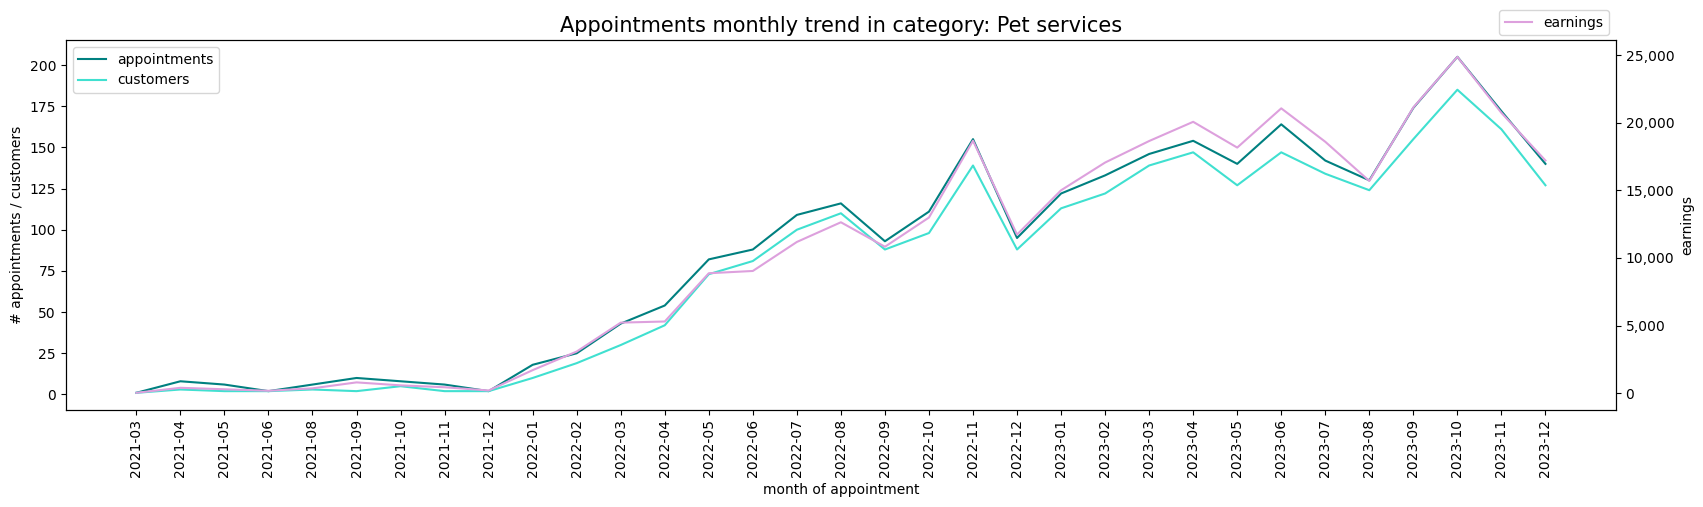

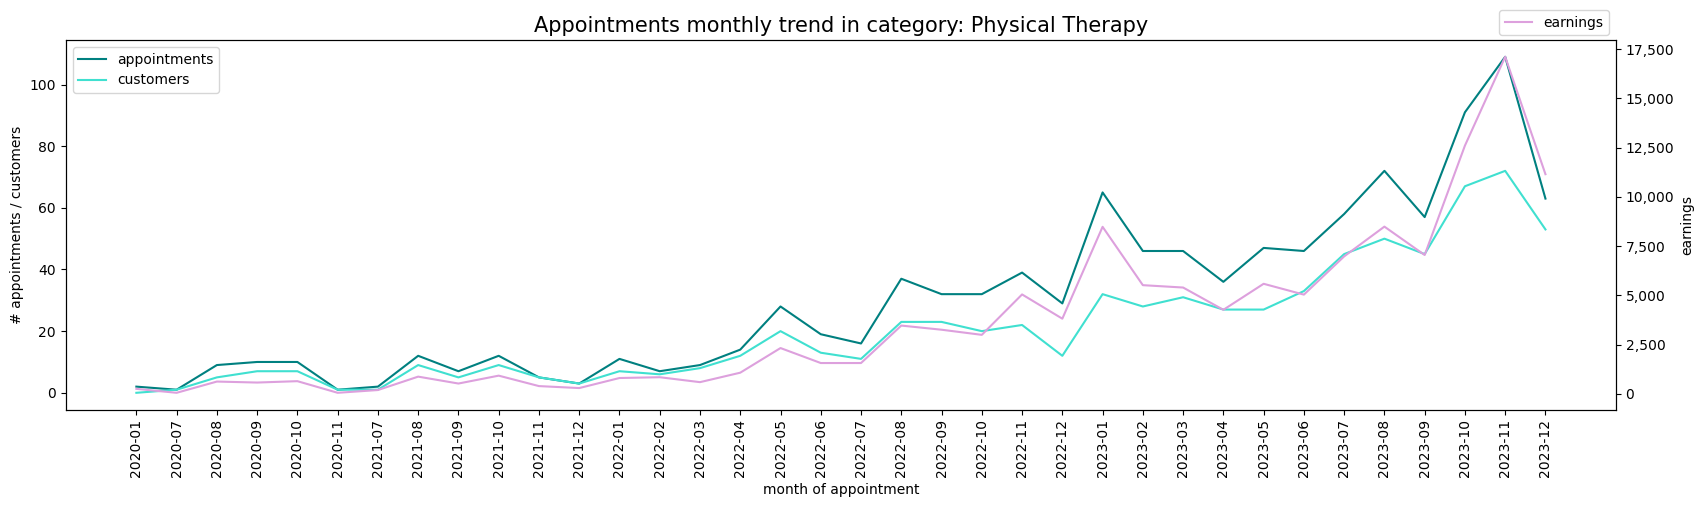

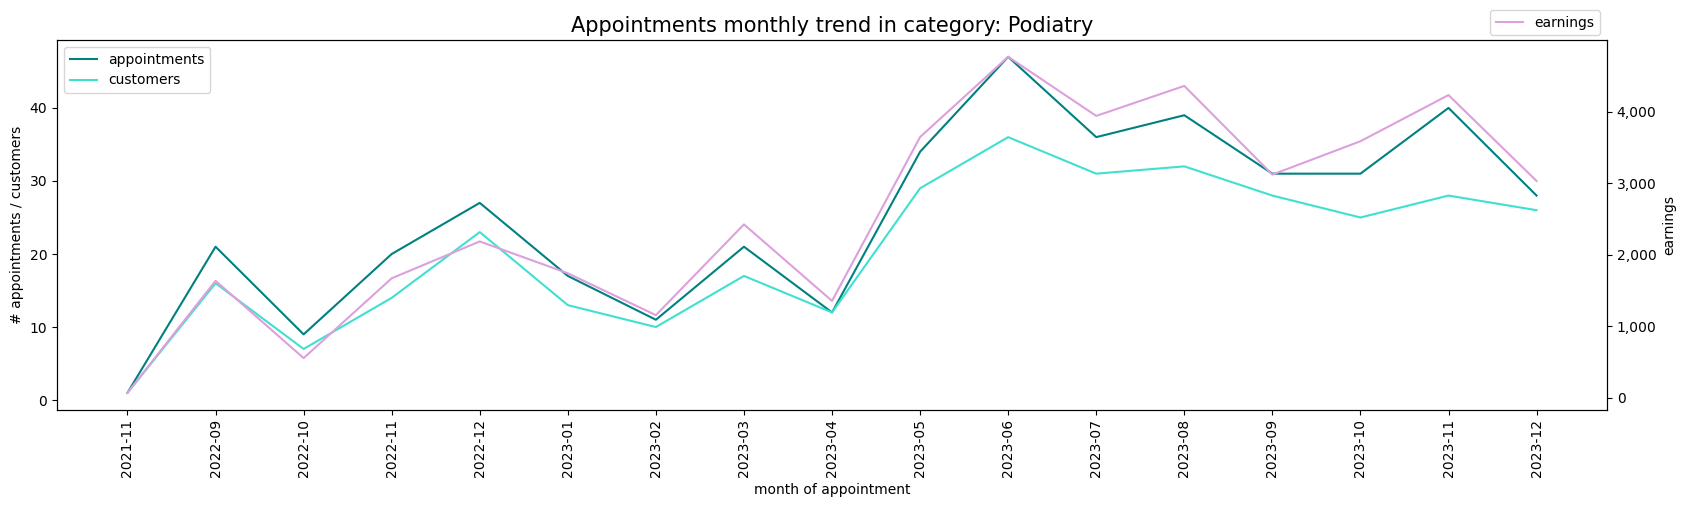

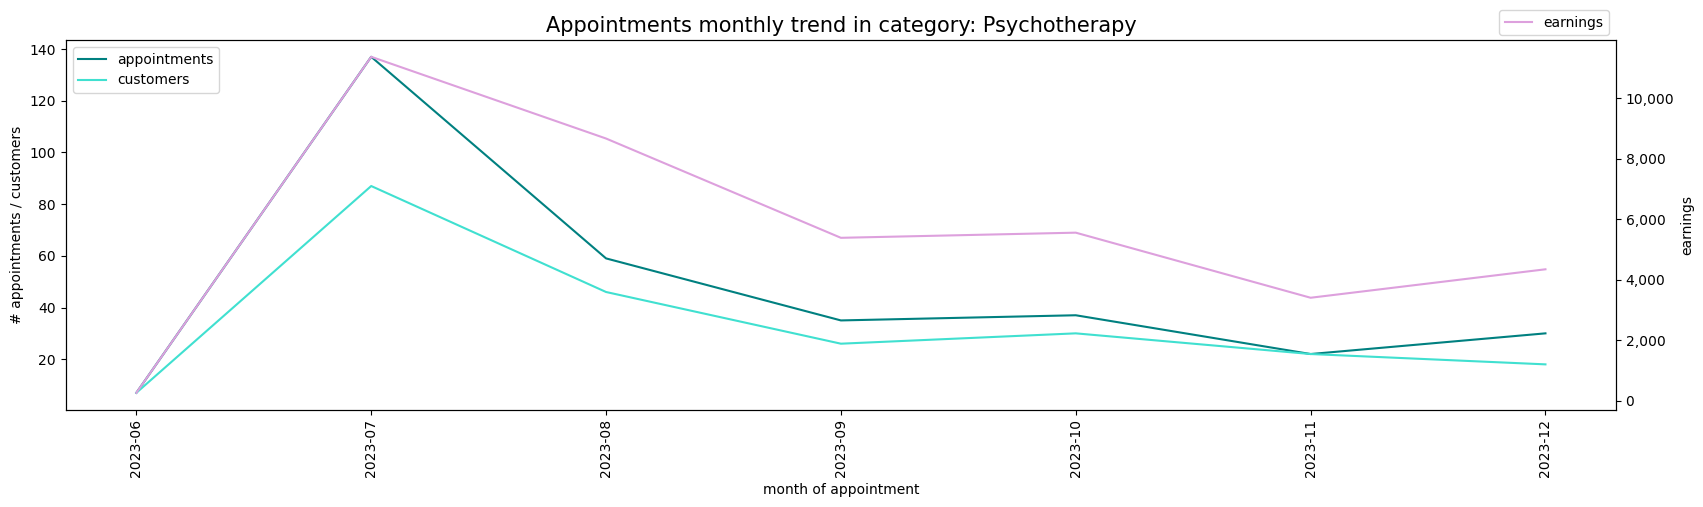

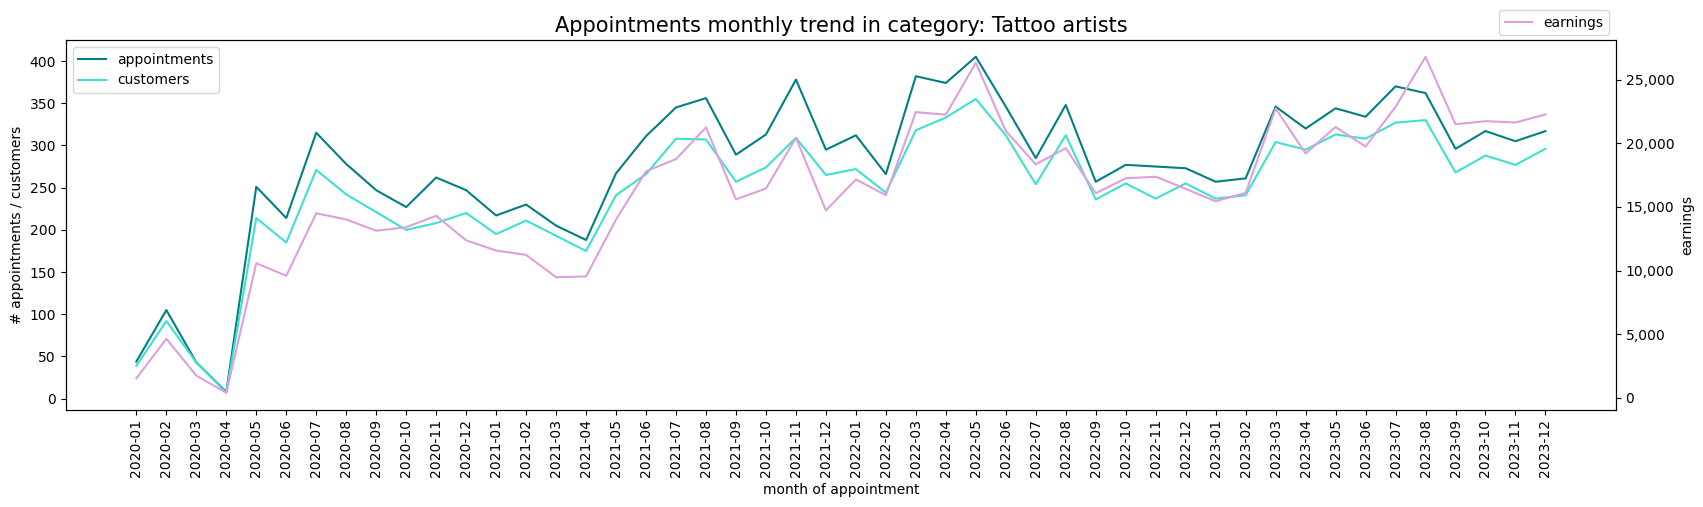

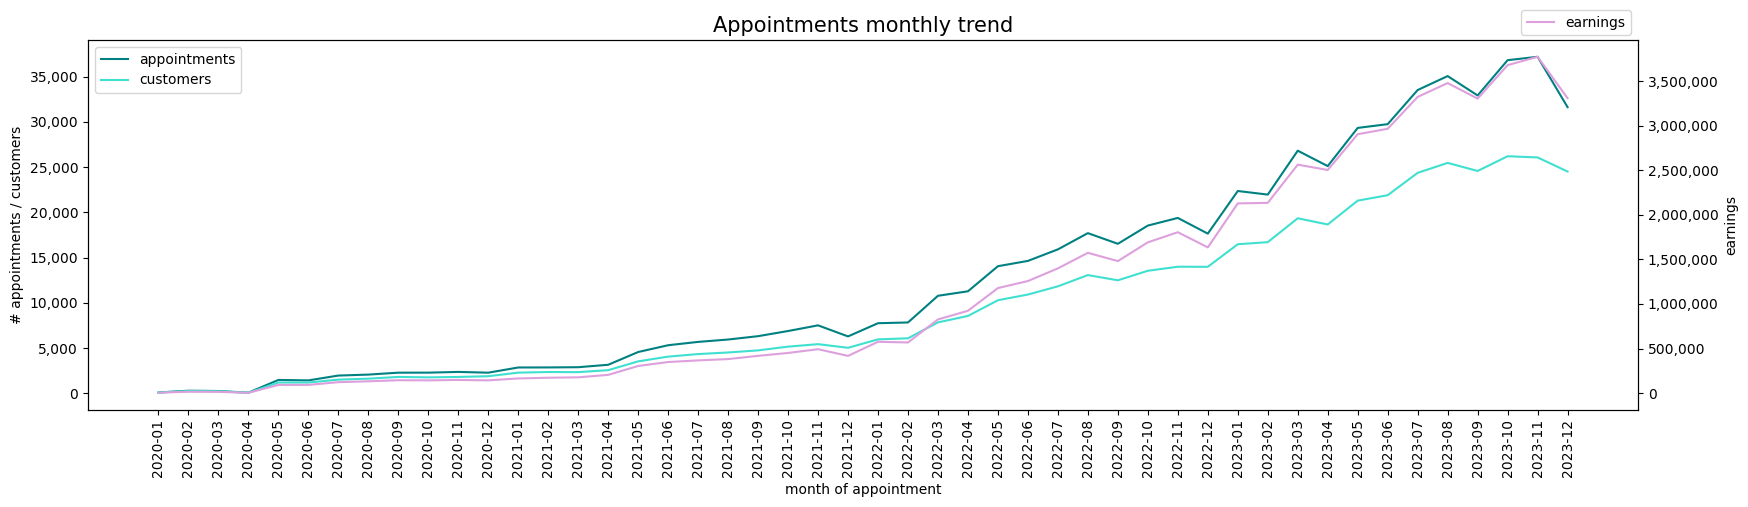

In [36]:
category_list = appointments_trend['category'].unique()
category_list.sort()


for c in category_list:

    df = appointments_trend[(appointments_trend['category']==c) & (appointments_trend['month_of_appointment']!='_TOTAL')]
    df.set_index('month_of_appointment', inplace=True)
    df = df.sort_index()
    
    # plotting trends
    
    fig, ax1 = plt.subplots()
    fig.set_figwidth(20)
    
    ax1.plot(df.index, df['app_cnt'], label='appointments', color='teal')
    ax1.plot(df.index, df['customer_cnt'], label='customers', color='turquoise')
    ax1.xaxis.set_tick_params(labelsize=10, rotation=90)
    ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
    plt.legend(loc='upper left')
    
    # adding second axis for earnings
    ax2 = ax1.twinx()
    ax2.plot(df.index, df['earnings'], label='earnings', color='plum')
    ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

    title = f'Appointments monthly trend in category: {c}' if c!='_TOTAL' else 'Appointments monthly trend'
    ax1.set_title(title, fontsize=15)
    
    ax1.set_xlabel('month of appointment')
    ax1.set_ylabel('# appointments / customers')
    ax2.set_ylabel('earnings')
    plt.legend(bbox_to_anchor=(1, 1.1))
    
    plt.show()

#### Activation of customers

In [37]:
# customer's first appointment

query = """
    SELECT
        STRFTIME('%Y-%m', first_appointment_date) AS month_of_activation,
        COUNT(customer_identifier) AS customer_cnt
    FROM (
        SELECT
            customer_identifier,
            MIN(created_dt) AS first_appointment_date
        FROM
            appointments
        WHERE
            booking_status='Finished'
            AND customer_identifier IS NOT NULL
        GROUP BY 1
    )
    GROUP BY 1
    ORDER BY 1
"""

cust_activ_trend = duckdb.query(query).df()

# replacing Pandas index with month_of_creation for plotting
cust_activ_trend.set_index('month_of_activation', inplace=True)

# adding a pseudo index column to calculate a trendline
idx=0
cust_activ_trend.insert(idx, 'index', value=np.arange(len(cust_activ_trend)))

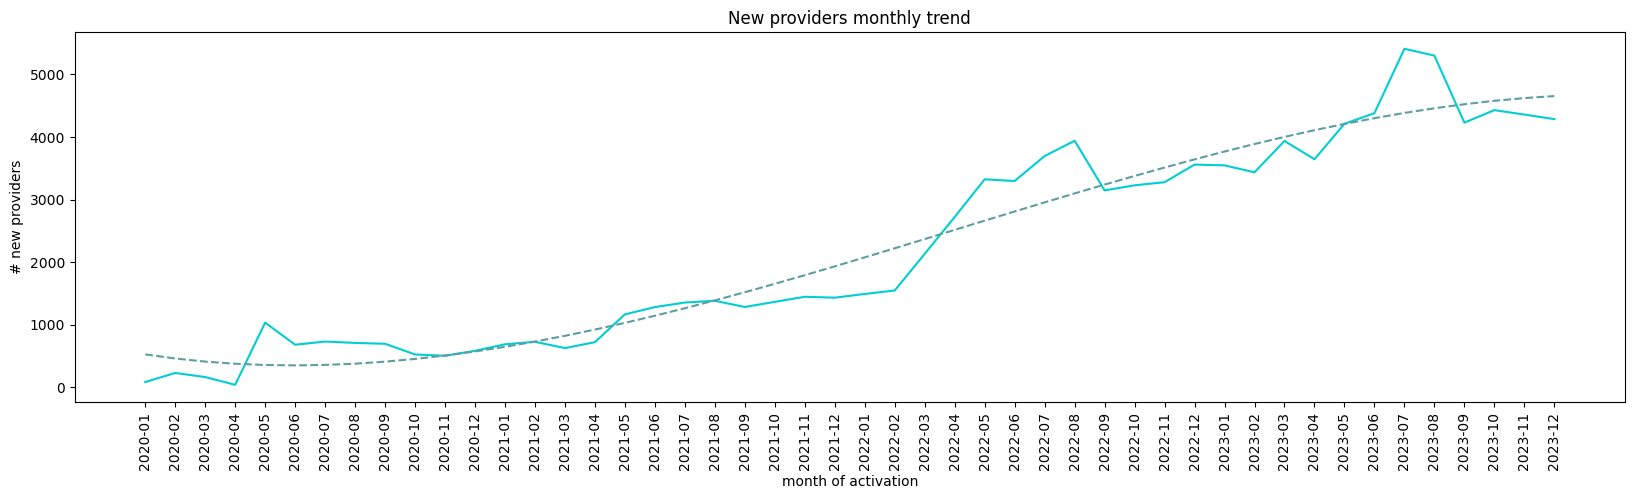

In [38]:
# plotting trends

fig, ax1 = plt.subplots()
fig.set_figwidth(20)

ax1.plot(cust_activ_trend.index, cust_activ_trend['customer_cnt'], label='customer_cnt', color='darkturquoise')
ax1.xaxis.set_tick_params(labelsize=10, rotation=90)
z = np.polyfit(cust_activ_trend['index'], cust_activ_trend['customer_cnt'], 3)
p = np.poly1d(z)
plt.plot(cust_activ_trend['index'], p(cust_activ_trend['index']), "--", color='cadetblue')

ax1.set_title('New providers monthly trend')

ax1.set_xlabel('month of activation')
ax1.set_ylabel('# new providers')

plt.show()

#### Structure of appointments per status

In [39]:
# customer's first appointment
query = """
    SELECT
        STRFTIME('%Y-%m', created_dt) AS month_of_activation,
        customer_identifier,
        booking_id,
        created_dt AS first_appointment_date,
        booking_status,
        total_price_adjusted,
        booking_source,
        SUM(IF(booking_status='Finished',total_price_adjusted, 0)) OVER (PARTITION BY customer_identifier) AS total_spendings
    FROM
        appointments
    WHERE
        customer_identifier IS NOT NULL
    QUALIFY
        ROW_NUMBER() OVER(PARTITION BY customer_identifier ORDER BY created_dt) = 1
"""

first_appointments = duckdb.query(query).df()

In [40]:
# booking statuses structure
booking_status_gr = appointments.groupby('booking_status', as_index=False).agg(appointment_cnt = ('booking_id', 'count'))

booking_status_gr['share'] = booking_status_gr['appointment_cnt'] / booking_status_gr['appointment_cnt'].sum()

print("\n All bookings:\n")
display(booking_status_gr
            .sort_values('share', ascending=False)
            .style
            .hide(axis="index")
            .format({'share':'{:.2%}'},
                    thousands=","
                   )
       )

# first appointment by status

first_booking_status_gr = first_appointments.groupby('booking_status', as_index=False).agg(appointment_cnt = ('booking_id', 'count'))

first_booking_status_gr['share'] = first_booking_status_gr['appointment_cnt'] / first_booking_status_gr['appointment_cnt'].sum()
print("\n \033[1mOnly first booking\033[0;0m of a customer:\n")
display(first_booking_status_gr
            .sort_values('share', ascending=False)
            .style
            .hide(axis="index")
            .format({'share':'{:.2%}'},
                    thousands=","
                   )
       )


 All bookings:




 Only first booking of a customer:

